# Exploratory Data Analysis

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 2 of 7 (Cleaning and Preprocessing - 2021 Data)

**Current Notebook**: 3 of 7

**Next Notebook**: 4 of 7 (Balancing Target Classes)

---

In this notebook I will combine the cleaned 2020 and 2021 data sets and perform exploratory data analysis on the final data set. I will also add the data containing information about estimated state populations from [The United States Census Bureau](https://www.census.gov/data/datasets/time-series/demo/popest/2020s-state-total.html#par_textimage_1873399417). 

I will use KBest to select which features will be included in the modeling and I will split the data into Remainder, test, train and validation sets.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Additional-Data" data-toc-modified-id="Additional-Data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Additional Data</a></span></li></ul></li><li><span><a href="#Visualizing-the-data" data-toc-modified-id="Visualizing-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Visualizing the data</a></span></li><li><span><a href="#Creating-Bins-for-Departure-Delays" data-toc-modified-id="Creating-Bins-for-Departure-Delays-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating Bins for Departure Delays</a></span><ul class="toc-item"><li><span><a href="#Create-Bins" data-toc-modified-id="Create-Bins-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Create Bins</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#KBest-Feature-Selection" data-toc-modified-id="KBest-Feature-Selection-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>KBest Feature Selection</a></span></li></ul></li><li><span><a href="#Train,-test-split" data-toc-modified-id="Train,-test-split-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Train, test split</a></span><ul class="toc-item"><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></li></ul></div>

---

Import the required libraries.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# splitting the data
from sklearn.model_selection import train_test_split

In [2]:
# use argument display.max_columns to display all columns, None sets it to an unlimited view
pd.set_option('display.max_columns', None)

Read in the cleaned 2021 data set. Use `read_pickle` to read the files.

In [3]:
atl_2021_clean = pd.read_pickle("data/atl_2021_clean.pkl")

Check the dataframe using `head` to view the first 10 rows of the dataframe.

In [4]:
# specify head(10) to get the first 10 columns

atl_2021_clean.head(10)

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2
0,2021,1,1,1,5,2021-01-01,9E,20363,9E,N272PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1354,1409,15.0,15.0,1.0,1.0,1300-1359,17.0,1426.0,1526.0,3.0,1508,1529,21.0,21.0,1.0,1.0,1500-1559,134.0,140.0,120.0,1,696,3,0.0,9.4,1.23,60,68,56,130,16.1
1,2021,1,1,1,5,2021-01-01,9E,20363,9E,N335PQ,4638,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11973,1197302,31973,GPT,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,1829,1829,0.0,0.0,0.0,0.0,1800-1859,22.0,1851.0,1855.0,5.0,1855,1900,5.0,5.0,0.0,0.0,1800-1859,86.0,91.0,64.0,1,352,2,0.0,9.4,1.23,60,68,56,130,16.1
2,2021,1,1,1,5,2021-01-01,9E,20363,9E,N336PQ,4644,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13422,1342202,30562,MOB,"Mobile, AL",AL,1,Alabama,51,1021,1019,-2.0,0.0,0.0,-1.0,1000-1059,9.0,1028.0,1028.0,3.0,1040,1031,-9.0,0.0,0.0,-1.0,1000-1059,79.0,72.0,60.0,1,302,2,0.0,9.4,1.23,60,68,56,130,16.1
3,2021,1,1,1,5,2021-01-01,9E,20363,9E,N902XJ,4649,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13485,1348502,33485,MSN,"Madison, WI",WI,55,Wisconsin,45,1015,1014,-1.0,0.0,0.0,-1.0,1000-1059,16.0,1030.0,1101.0,3.0,1121,1104,-17.0,0.0,0.0,-2.0,1100-1159,126.0,110.0,91.0,1,707,3,0.0,9.4,1.23,60,68,56,130,16.1
4,2021,1,1,1,5,2021-01-01,9E,20363,9E,N910XJ,4651,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,1040,1100,20.0,20.0,1.0,1.0,1000-1059,20.0,1120.0,1211.0,2.0,1200,1213,13.0,13.0,0.0,0.0,1200-1259,80.0,73.0,51.0,1,399,2,0.0,9.4,1.23,60,68,56,130,16.1
5,2021,1,1,1,5,2021-01-01,9E,20363,9E,N8974C,4652,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11308,1130802,31308,DHN,"Dothan, AL",AL,1,Alabama,51,1349,1347,-2.0,0.0,0.0,-1.0,1300-1359,16.0,1403.0,1350.0,5.0,1345,1355,10.0,10.0,0.0,0.0,1300-1359,56.0,68.0,47.0,1,170,1,0.0,9.4,1.23,60,68,56,130,16.1
6,2021,1,1,1,5,2021-01-01,9E,20363,9E,N272PQ,4655,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,805,825,20.0,20.0,1.0,1.0,0800-0859,14.0,839.0,937.0,4.0,921,941,20.0,20.0,1.0,1.0,0900-0959,136.0,136.0,118.0,1,696,3,0.0,9.4,1.23,60,68,56,130,16.1
7,2021,1,1,1,5,2021-01-01,9E,20363,9E,N131EV,4656,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12448,1244807,32448,JAN,"Jackson/Vicksburg, MS",MS,28,Mississippi,53,1030,1446,256.0,256.0,1.0,12.0,1000-1059,10.0,1456.0,1457.0,5.0,1053,1502,249.0,249.0,1.0,12.0,1000-1059,83.0,76.0,61.0,1,341,2,0.0,9.4,1.23,60,68,56,130,16.1
8,2021,1,1,1,5,2021-01-01,9E,20363,9E,N8839E,4657,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15607,1560702,35550,VLD,"Valdosta, GA",GA,13,Georgia,34,1000,1004,4.0,4.0,0.0,0.0,1000-1059,12.0,1016.0,1057.0,5.0,1057,1102,5.0,5.0,0.0,0.0,1000-1059,57.0,58.0,41.0,1,208,1,0.0,9.4,1.23,60,68,56,130,16.1
9,2021,1,1,1,5,2021-01-01,9E,20363,9E,N299PQ,4669,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11995,1199502,31995,GSO,"Greensboro/High Point, NC",NC,37,North Carolina,36,2100,2055,-5.0,0.0,0.0,-1.0,2100-2159,19.0,2114.0,2158.0,2.0,2212,2200,-12.0,0.0,0.0,-1.0,2200-2259,72.0,65.0,44.0,1,306,2,0.0,9.4,1.23,60,68,56,130,16.1


Read in the cleaned 2020 data set.

In [5]:
atl_2020_clean = pd.read_pickle("data/atl_2020_clean.pkl")

View the first 10 rows of the dataframe.

In [6]:
atl_2020_clean.head(10)

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.0,45,57,36,280,13.0
1,2020,1,1,1,3,2020-01-01,B6,20409,B6,N591JB,1153,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,1203,1156,-7.0,0.0,0.0,-1.0,1200-1259,12.0,1208.0,1305.0,7.0,1337,1312,-25.0,0.0,0.0,-2.0,1300-1359,94.0,76.0,57.0,1,404,2,0.0,7.16,0.0,45,57,36,280,13.0
2,2020,1,1,1,3,2020-01-01,B6,20409,B6,N571JB,2932,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,925,917,-8.0,0.0,0.0,-1.0,0900-0959,11.0,928.0,1100.0,12.0,1123,1112,-11.0,0.0,0.0,-1.0,1100-1159,118.0,115.0,92.0,1,581,3,0.0,7.16,0.0,45,57,36,280,13.0
3,2020,1,1,1,3,2020-01-01,OH,20397,OH,N526EA,5216,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1943,1952,9.0,9.0,0.0,0.0,1900-1959,20.0,2012.0,2103.0,14.0,2113,2117,4.0,4.0,0.0,0.0,2100-2159,90.0,85.0,51.0,1,226,1,0.0,7.16,0.0,45,57,36,280,13.0
4,2020,1,1,1,3,2020-01-01,OH,20397,OH,N597NN,5354,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1810,1917,67.0,67.0,1.0,4.0,1800-1859,15.0,1932.0,2014.0,33.0,1931,2047,76.0,76.0,1.0,5.0,1900-1959,81.0,90.0,42.0,1,226,1,0.0,7.16,0.0,45,57,36,280,13.0
5,2020,1,1,1,3,2020-01-01,AA,19805,AA,N931NN,368,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,2048,2046,-2.0,0.0,0.0,-1.0,2000-2059,14.0,2100.0,2309.0,12.0,2315,2321,6.0,6.0,0.0,0.0,2300-2359,267.0,275.0,249.0,1,1587,7,0.0,7.16,0.0,45,57,36,280,13.0
6,2020,1,1,1,3,2020-01-01,AA,19805,AA,N712US,1365,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1224,1218,-6.0,0.0,0.0,-1.0,1200-1259,17.0,1235.0,1349.0,4.0,1355,1353,-2.0,0.0,0.0,-1.0,1300-1359,151.0,155.0,134.0,1,731,3,0.0,7.16,0.0,45,57,36,280,13.0
7,2020,1,1,1,3,2020-01-01,AA,19805,AA,N358PW,1409,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,1608,1705,57.0,57.0,1.0,3.0,1600-1659,14.0,1719.0,1911.0,10.0,1824,1921,57.0,57.0,1.0,3.0,1800-1859,316.0,316.0,292.0,1,1947,8,0.0,7.16,0.0,45,57,36,280,13.0
8,2020,1,1,1,3,2020-01-01,AA,19805,AA,N921NN,1567,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,757,747,-10.0,0.0,0.0,-1.0,0700-0759,19.0,806.0,927.0,11.0,933,938,5.0,5.0,0.0,0.0,0900-0959,156.0,171.0,141.0,1,731,3,0.0,7.16,0.0,45,57,36,280,13.0
9,2020,1,1,1,3,2020-01-01,AA,19805,AA,N8001N,1574,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,745,831,46.0,46.0,1.0,3.0,0700-0759,15.0,846.0,923.0,8.0,856,931,35.0,35.0,1.0,2.0,0800-0859,131.0,120.0,97.0,1,606,3,0.0,7.16,0.0,45,57,36,280,13.0


Check the shape of the 2021 and 2020 data sets.

In [7]:
atl_2021_clean.shape

(310585, 61)

In [8]:
atl_2020_clean.shape

(242931, 61)

Check that data types are as they should be from the previous notebook. 

In [9]:
atl_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310585 entries, 0 to 310584
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Year                             310585 non-null  int32         
 1   Quarter                          310585 non-null  int8          
 2   Month                            310585 non-null  int8          
 3   DayofMonth                       310585 non-null  int8          
 4   DayofWeek                        310585 non-null  int8          
 5   FlightDate                       310585 non-null  datetime64[ns]
 6   Reporting_Airline                310585 non-null  object        
 7   DOT_ID_Reporting_Airline         310585 non-null  int32         
 8   IATA_CODE_Reporting_Airline      310585 non-null  object        
 9   Tail_Number                      310585 non-null  object        
 10  Flight_Number_Reporting_Airline  310585 non-

Repeat for the 2020 dataframe.

In [10]:
atl_2020_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242931 entries, 0 to 242930
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Year                             242931 non-null  int32         
 1   Quarter                          242931 non-null  int8          
 2   Month                            242931 non-null  int8          
 3   DayofMonth                       242931 non-null  int8          
 4   DayofWeek                        242931 non-null  int8          
 5   FlightDate                       242931 non-null  datetime64[ns]
 6   Reporting_Airline                242931 non-null  object        
 7   DOT_ID_Reporting_Airline         242931 non-null  int32         
 8   IATA_CODE_Reporting_Airline      242931 non-null  object        
 9   Tail_Number                      242931 non-null  object        
 10  Flight_Number_Reporting_Airline  242931 non-

Check for any missing values in the 2021 and 2020 data sets.

In [11]:
atl_2021_clean.isnull().sum().sum()

0

There are no missing values in the 2021 dataframe.

In [12]:
atl_2020_clean.isnull().sum().sum()

0

There are no missing values in the 2020 dataframe.

Concatenate the two dataframes to create a final cleaned dataframe with both years.

In [13]:
# axis = 0 specifies that the dataframes are joined on the rows not the columns 

atl_df = pd.concat([atl_2020_clean, atl_2021_clean], axis = 0)

In [14]:
atl_df

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.0,45,57,36,280,13.0
1,2020,1,1,1,3,2020-01-01,B6,20409,B6,N591JB,1153,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,1203,1156,-7.0,0.0,0.0,-1.0,1200-1259,12.0,1208.0,1305.0,7.0,1337,1312,-25.0,0.0,0.0,-2.0,1300-1359,94.0,76.0,57.0,1,404,2,0.0,7.16,0.0,45,57,36,280,13.0
2,2020,1,1,1,3,2020-01-01,B6,20409,B6,N571JB,2932,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,925,917,-8.0,0.0,0.0,-1.0,0900-0959,11.0,928.0,1100.0,12.0,1123,1112,-11.0,0.0,0.0,-1.0,1100-1159,118.0,115.0,92.0,1,581,3,0.0,7.16,0.0,45,57,36,280,13.0
3,2020,1,1,1,3,2020-01-01,OH,20397,OH,N526EA,5216,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1943,1952,9.0,9.0,0.0,0.0,1900-1959,20.0,2012.0,2103.0,14.0,2113,2117,4.0,4.0,0.0,0.0,2100-2159,90.0,85.0,51.0,1,226,1,0.0,7.16,0.0,45,57,36,280,13.0
4,2020,1,1,1,3,2020-01-01,OH,20397,OH,N597NN,5354,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1810,1917,67.0,67.0,1.0,4.0,1800-1859,15.0,1932.0,2014.0,33.0,1931,2047,76.0,76.0,1.0,5.0,1900-1959,81.0,90.0,42.0,1,226,1,0.0,7.16,0.0,45,57,36,280,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310580,2021,4,12,14,2,2021-12-14,B6,20409,B6,N3023J,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1048,1050,2.0,2.0,0.0,0.0,1000-1059,19.0,1109.0,1311.0,5.0,1316,1316,0.0,0.0,0.0,0.0,1300-1359,148.0,146.0,122.0,1,946,4,0.0,3.13,0.0,50,69,37,90,8.9
310581,2021,4,12,14,2,2021-12-14,B6,20409,B6,N652JB,467,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,630,640,10.0,10.0,0.0,0.0,0600-0659,12.0,652.0,812.0,9.0,819,821,2.0,2.0,0.0,0.0,0800-0859,109.0,101.0,80.0,1,581,3,0.0,3.13,0.0,50,69,37,90,8.9
310582,2021,4,12,14,2,2021-12-14,B6,20409,B6,N809JB,520,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1151,1205,14.0,14.0,0.0,0.0,1100-1159,16.0,1221.0,1407.0,8.0,1356,1415,19.0,19.0,1.0,1.0,1300-1359,125.0,130.0,106.0,1,760,4,0.0,3.13,0.0,50,69,37,90,8.9
310583,2021,4,12,14,2,2021-12-14,B6,20409,B6,N526JL,720,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1620,1728,68.0,68.0,1.0,4.0,1600-1659,14.0,1742.0,1930.0,55.0,1830,2025,115.0,115.0,1.0,7.0,1800-1859,130.0,177.0,108.0,1,760,4,0.0,3.13,0.0,50,69,37,90,8.9


Check the shape of the new dataframe.

In [15]:
# Use shape, and index = 0 to get the number of rows of the dataframe 
# and index = 1 to get the columns of the dataframe 

print(f"There are {atl_df.shape[0]} rows and {atl_df.shape[1]} columns.")

There are 553516 rows and 61 columns.


---

### Additional Data

Read in the additional data sets that contain information about state populations and airline names. 

I chose to include state populations as a feature in my analysis because I believe that there could be some correlation between populous states and delayed flights. Since I don't have any passenger information, state populations could act as a proxy. The data was downloaded from [The United States Census Bureau](https://www.census.gov/data/datasets/time-series/demo/popest/2020s-state-total.html#par_textimage_1873399417). 

The airline names data set includes the name of the airline, I chose to include this information purely for visualization purposes, since currently the airlines are denoted by a 2-character code. I got the airline name that corresponds to each airline code from [The Bureau of Transporation Statistics](https://www.bts.gov/topics/airlines-and-airports/airline-codes). 

In [16]:
populations = pd.read_csv("data/state_pop_2021.csv")

This data set contains:
- The state name
- The estimated state populations from 2021

In [17]:
# merge with final dataset
populations

,NAME,Dest_State_Population
0,Alabama,5039877
1,Alaska,732673
2,Arizona,7276316
3,Arkansas,3025891
4,California,39237836
5,Colorado,5812069
6,Connecticut,3605597
7,Delaware,1003384
8,District of Columbia,670050
9,Florida,21781128


---

Read in the data with the airline names.

In [18]:
airlines = pd.read_csv("data/Airline_codes_names_BTS.csv")

This data set contains:
- Unique 2 character IATA code
- The Airline name

In [19]:
airlines

,IATA_Code,Airline_Name
0,WN,Southwest Airlines Co.
1,OO,SkyWest Airlines Inc.
2,DL,Delta Air Lines Inc.
3,AA,American Airlines Inc.
4,UA,United Air Lines Inc.
5,YX,Republic Airways
6,9E,Endeavor Air Inc.
7,MQ,Envoy Air
8,OH,PSA Airlines Inc.
9,B6,JetBlue Airways


---

Merge atl_df with airlines using `merge` and join the dataframes on the 'Reporting_Airline' column from atl_df and the 'IATA_Code' column from airlines.

In [20]:
# merge the two dataframes

atl_df = atl_df.merge(airlines, left_on = "Reporting_Airline", right_on = "IATA_Code")

Check that the dataframes have been correctly merged.

In [21]:
atl_df

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,IATA_Code,Airline_Name
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.0,45,57,36,280,13.0,B6,JetBlue Airways
1,2020,1,1,1,3,2020-01-01,B6,20409,B6,N591JB,1153,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,1203,1156,-7.0,0.0,0.0,-1.0,1200-1259,12.0,1208.0,1305.0,7.0,1337,1312,-25.0,0.0,0.0,-2.0,1300-1359,94.0,76.0,57.0,1,404,2,0.0,7.16,0.0,45,57,36,280,13.0,B6,JetBlue Airways
2,2020,1,1,1,3,2020-01-01,B6,20409,B6,N571JB,2932,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,925,917,-8.0,0.0,0.0,-1.0,0900-0959,11.0,928.0,1100.0,12.0,1123,1112,-11.0,0.0,0.0,-1.0,1100-1159,118.0,115.0,92.0,1,581,3,0.0,7.16,0.0,45,57,36,280,13.0,B6,JetBlue Airways
3,2020,1,1,1,3,2020-01-01,B6,20409,B6,N569JB,467,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,610,605,-5.0,0.0,0.0,-1.0,0600-0659,14.0,619.0,743.0,6.0,800,749,-11.0,0.0,0.0,-1.0,0800-0859,110.0,104.0,84.0,1,581,3,0.0,7.16,0.0,45,57,36,280,13.0,B6,JetBlue Airways
4,2020,1,1,1,3,2020-01-01,B6,20409,B6,N358JB,520,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1101,1054,-7.0,0.0,0.0,-1.0,1100-1159,13.0,1107.0,1244.0,6.0,1310,1250,-20.0,0.0,0.0,-2.0,1300-1359,129.0,116.0,97.0,1,760,4,0.0,7.16,0.0,45,57,36,280,13.0,B6,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553511,2020,2,5,1,5,2020-05-01,EV,20366,EV,N616UX,3907,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,1748,1813,25.0,25.0,1.0,1.0,1700-1759,16.0,1829.0,1908.0,10.0,1900,1918,18.0,18.0,1.0,1.0,1900-1959,132.0,125.0,99.0,1,689,3,0.0,10.51,0.0,60,75,48,330,23.0,EV,ExpressJet Airlines Inc.
553512,2020,2,5,1,5,2020-05-01,EV,20366,EV,N614UX,3991,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,1924,1920,-4.0,0.0,0.0,-1.0,1900-1959,17.0,1937.0,2029.0,7.0,2047,2036,-11.0,0.0,0.0,-1.0,2000-2059,143.0,136.0,112.0,1,689,3,0.0,10.51,0.0,60,75,48,330,23.0,EV,ExpressJet Airlines Inc.
553513,2020,2,5,2,6,2020-05-02,EV,20366,EV,N610UX,3907,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,1748,1743,-5.0,0.0,0.0,-1.0,1700-1759,15.0,1758.0,1840.0,5.0,1900,1845,-15.0,0.0,0.0,-1.0,1900-1959,132.0,122.0,102.0,1,689,3,0.0,4.47,0.0,67,82,52,210,13.0,EV,ExpressJet Airlines Inc.
553514,2020,2,5,2,6,2020-05-02,EV,20366,EV,N614UX,3922,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,2006,1955,-11.0,0.0,0.0,-1.0,2000-2059,17.0,2012.0,2042.0,2.0,2115,2044,-31.0,0.0,0.0,-2.0,2100

Repeat the merge step with atl_df and the populations dataframe, joining on "DestStateName" from atl_df and "NAME" from populations.

In [22]:
atl_df = atl_df.merge(populations, left_on = "DestStateName", right_on = "NAME")

Check the dataframes have been merged correctly.

In [23]:
atl_df

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,IATA_Code,Airline_Name,NAME,Dest_State_Population
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.00,45,57,36,280,13.0,B6,JetBlue Airways,Massachusetts,6984723
1,2020,1,1,2,4,2020-01-02,B6,20409,B6,N606JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,507,6.0,6.0,0.0,0.0,0001-0559,13.0,520.0,720.0,5.0,733,725,-8.0,0.0,0.0,-1.0,0700-0759,152.0,138.0,120.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,B6,JetBlue Airways,Massachusetts,6984723
2,2020,1,1,2,4,2020-01-02,B6,20409,B6,N206JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1004,-6.0,0.0,0.0,-1.0,1000-1059,12.0,1016.0,1219.0,6.0,1245,1225,-20.0,0.0,0.0,-2.0,1200-1259,155.0,141.0,123.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,B6,JetBlue Airways,Massachusetts,6984723
3,2020,1,1,3,5,2020-01-03,B6,20409,B6,N775JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,500,-1.0,0.0,0.0,-1.0,0001-0559,14.0,514.0,709.0,19.0,733,728,-5.0,0.0,0.0,-1.0,0700-0759,152.0,148.0,115.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,B6,JetBlue Airways,Massachusetts,6984723
4,2020,1,1,3,5,2020-01-03,B6,20409,B6,N197JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1032,22.0,22.0,1.0,1.0,1000-1059,56.0,1128.0,1325.0,7.0,1245,1332,47.0,47.0,1.0,3.0,1200-1259,155.0,180.0,117.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,B6,JetBlue Airways,Massachusetts,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549347,2021,4,12,2,4,2021-12-02,DL,19790,DL,N345DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,950,0.0,0.0,0.0,0.0,0900-0959,12.0,1002.0,1205.0,3.0,1237,1208,-29.0,0.0,0.0,-2.0,1200-1259,287.0,258.0,243.0,1,1838,8,0.0,8.28,0.00,59,74,49,300,18.1,DL,Delta Air Lines Inc.,Idaho,1900923
549348,2021,4,12,3,5,2021-12-03,DL,19790,DL,N385DZ,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,947,-3.0,0.0,0.0,-1.0,0900-0959,14.0,1001.0,1154.0,4.0,1237,1158,-39.0,0.0,0.0,-2.0,1200-1259,287.0,251.0,233.0,1,1838,8,0.0,5.82,0.00,61,77,50,280,10.1,DL,Delta Air Lines Inc.,Idaho,1900923
549349,2021,4,12,6,1,2021-12-06,DL,19790,DL,N386DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,1007,17.0,17.0,1.0,1.0,0900-0959,29.0,1036.0,1311.0,4.0,1232,1315,43.0,43.0,1.0,2.0,1200-1259,282.0,308.0,275.0,1,1838,8,0.0,7.83,0.37,59,64,45,340,21.9,DL,Delta Air Lines Inc.,Idaho,1900923
549350,2021,4,12,13,1,2021-12-13,DL,19790,DL,N313DN,835,10397,1039707,30397,ATL,"Atlanta, GA",

---

Some redundant columns have been added, so they need to be dropped now, the redundant columns are listed below and dropped using `drop` and specifying the column names.

In [24]:
atl_df = atl_df.drop(columns = ["NAME", "IATA_Code"])

Check that the columns have been dropped.

In [25]:
atl_df

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.00,45,57,36,280,13.0,JetBlue Airways,6984723
1,2020,1,1,2,4,2020-01-02,B6,20409,B6,N606JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,507,6.0,6.0,0.0,0.0,0001-0559,13.0,520.0,720.0,5.0,733,725,-8.0,0.0,0.0,-1.0,0700-0759,152.0,138.0,120.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,JetBlue Airways,6984723
2,2020,1,1,2,4,2020-01-02,B6,20409,B6,N206JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1004,-6.0,0.0,0.0,-1.0,1000-1059,12.0,1016.0,1219.0,6.0,1245,1225,-20.0,0.0,0.0,-2.0,1200-1259,155.0,141.0,123.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,JetBlue Airways,6984723
3,2020,1,1,3,5,2020-01-03,B6,20409,B6,N775JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,500,-1.0,0.0,0.0,-1.0,0001-0559,14.0,514.0,709.0,19.0,733,728,-5.0,0.0,0.0,-1.0,0700-0759,152.0,148.0,115.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,JetBlue Airways,6984723
4,2020,1,1,3,5,2020-01-03,B6,20409,B6,N197JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1032,22.0,22.0,1.0,1.0,1000-1059,56.0,1128.0,1325.0,7.0,1245,1332,47.0,47.0,1.0,3.0,1200-1259,155.0,180.0,117.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549347,2021,4,12,2,4,2021-12-02,DL,19790,DL,N345DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,950,0.0,0.0,0.0,0.0,0900-0959,12.0,1002.0,1205.0,3.0,1237,1208,-29.0,0.0,0.0,-2.0,1200-1259,287.0,258.0,243.0,1,1838,8,0.0,8.28,0.00,59,74,49,300,18.1,Delta Air Lines Inc.,1900923
549348,2021,4,12,3,5,2021-12-03,DL,19790,DL,N385DZ,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,947,-3.0,0.0,0.0,-1.0,0900-0959,14.0,1001.0,1154.0,4.0,1237,1158,-39.0,0.0,0.0,-2.0,1200-1259,287.0,251.0,233.0,1,1838,8,0.0,5.82,0.00,61,77,50,280,10.1,Delta Air Lines Inc.,1900923
549349,2021,4,12,6,1,2021-12-06,DL,19790,DL,N386DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,1007,17.0,17.0,1.0,1.0,0900-0959,29.0,1036.0,1311.0,4.0,1232,1315,43.0,43.0,1.0,2.0,1200-1259,282.0,308.0,275.0,1,1838,8,0.0,7.83,0.37,59,64,45,340,21.9,Delta Air Lines Inc.,1900923
549350,2021,4,12,13,1,2021-12-13,DL,19790,DL,N313DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,942,-8.0,0.0,0.0,-1.0,0900-0959,24.0,1006.0,1221.0,6.0,1232,122

Check the shape of the final dataframe.

In [26]:
print(f"There are {atl_df.shape[0]} rows and {atl_df.shape[1]} columns.")

There are 549352 rows and 63 columns.


Check that the data types are correct for all the columns.

In [27]:
atl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549352 entries, 0 to 549351
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Year                             549352 non-null  int32         
 1   Quarter                          549352 non-null  int8          
 2   Month                            549352 non-null  int8          
 3   DayofMonth                       549352 non-null  int8          
 4   DayofWeek                        549352 non-null  int8          
 5   FlightDate                       549352 non-null  datetime64[ns]
 6   Reporting_Airline                549352 non-null  object        
 7   DOT_ID_Reporting_Airline         549352 non-null  int32         
 8   IATA_CODE_Reporting_Airline      549352 non-null  object        
 9   Tail_Number                      549352 non-null  object        
 10  Flight_Number_Reporting_Airline  549352 non-

---

## Visualizing the data

I'm going to explore the data visually.

I will create 4 subplots to visualize the distribution of data across years, months, day of week and day of month.

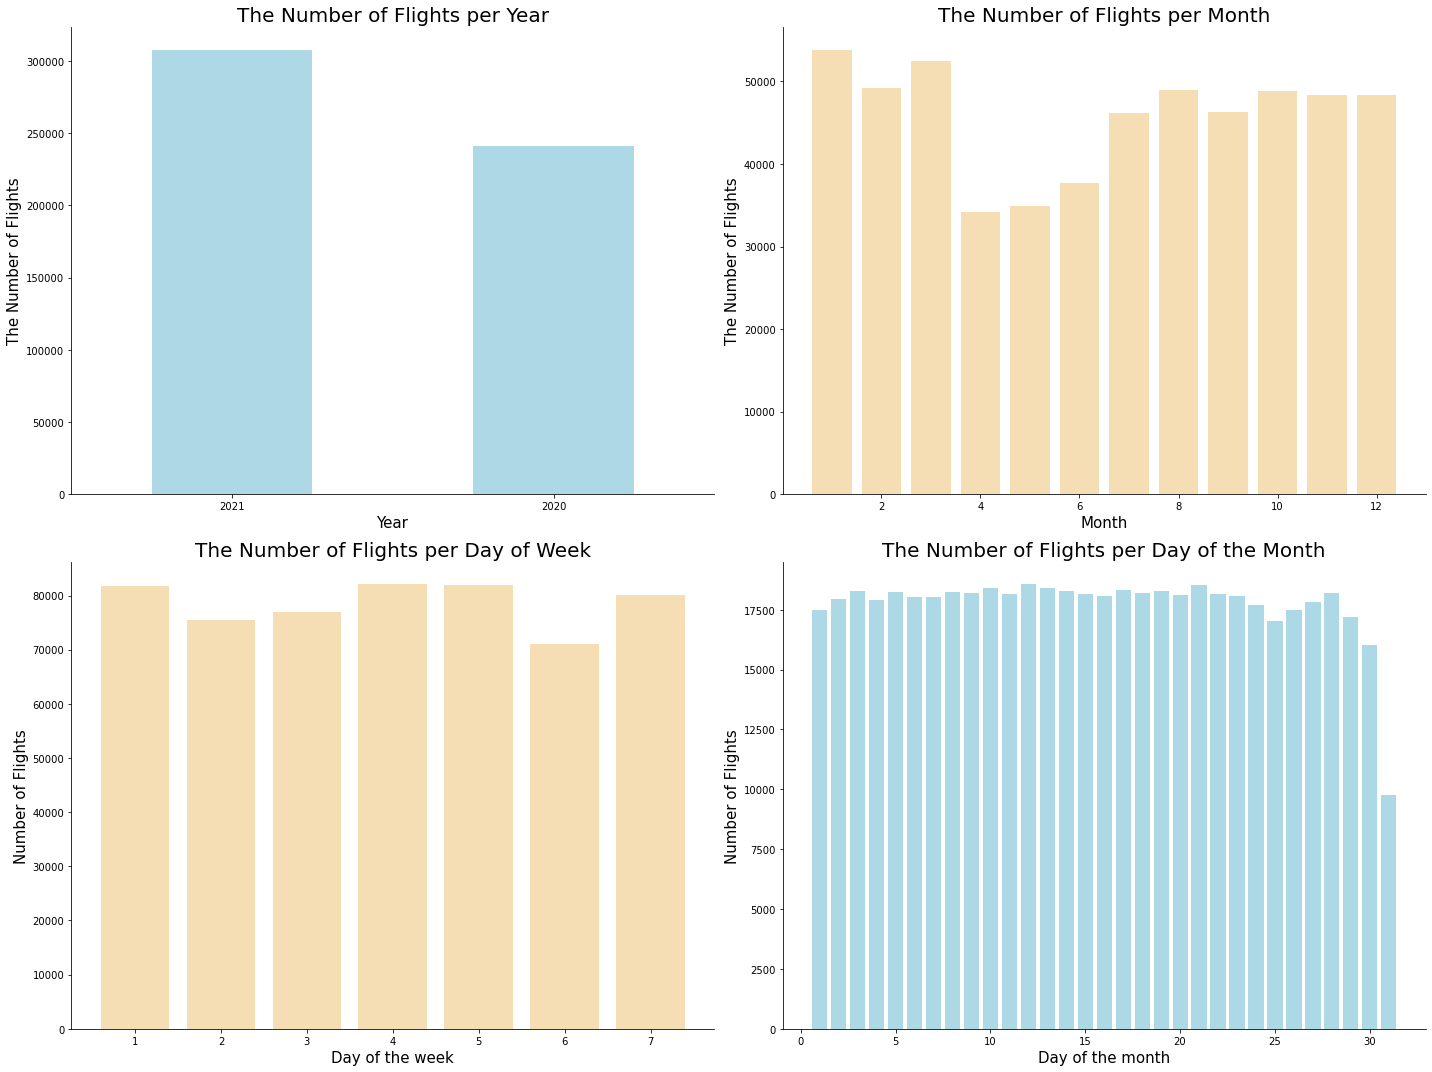

In [28]:
# create a 2x2 grid of subplots
plt.subplots(2, 2, figsize = (20, 15))



# SUBPLOT 1
plt.subplot(2, 2, 1)

# plot the value counts for each year using a bar plot
atl_df['Year'].value_counts().plot(kind = 'bar', color ='lightblue')

# set the lable axes and plot title
plt.ylabel("The Number of Flights", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.xticks(rotation = 0)
plt.title("The Number of Flights per Year", fontsize = 20)




# SUBPLOT 2
plt.subplot(2, 2, 2)

# plot the value counts for each month using a bar plot
plt.bar(atl_df["Month"].value_counts().index, atl_df["Month"].value_counts().values, color = "wheat")

# set the lable axes and plot title
plt.xlabel("Month", fontsize = 15)
plt.ylabel("The Number of Flights", fontsize = 15)
plt.title("The Number of Flights per Month", fontsize = 20)





# SUBPLOT 3
plt.subplot(2, 2, 3) 

# plot the value counts for each day of the week using a bar plot
plt.bar(atl_df['DayofWeek'].value_counts().index, atl_df['DayofWeek'].value_counts().values, color = "wheat")

# set the lable axes and plot title
plt.xlabel('Day of the week', fontsize = 15)
plt.ylabel('Number of Flights', fontsize = 15)
plt.title('The Number of Flights per Day of Week', fontsize = 20)





# SUBPLOT 4
plt.subplot(2, 2, 4)

# plot the value counts for each day of the month using a bar plot
plt.bar(atl_df['DayofMonth'].value_counts().index, atl_df['DayofMonth'].value_counts().values, color = 'lightblue')

# set the lable axes and plot title
plt.xlabel('Day of the month', fontsize = 15)
plt.ylabel('Number of Flights', fontsize = 15)
plt.title("The Number of Flights per Day of the Month", fontsize = 20)




# use tight_layout() to prevent overlap of plot labels
plt.tight_layout()

# use despine to remove the border around the top and right axes
sns.despine()


plt.show()

**Observations**
- There were approximately 50,000 more flights in 2021 than 2020. This is expected since the COVID-19 pandemic significantly affected air travel across the globe;

- There were significantly less flights between April and June across both years. This effect is due to the COVID-19 pandemic which significantly reduced flights in 2020;

- The number of flights for each day of the week appears relatively even, except for day 6 (Saturday) which is slightly lower than the rest. This is surprising, I would expect more flights on the weekend. But since they're only domestic flights more people could be traveling places for the weekend and therefore are more likely to travel on Friday or Sunday, which are both higher than Saturday;

- The number of flights per day of month are also relatively even, except for the 31st which is lower than the other days. This could be due to the fact that there are less months that have 31 days, and not that people do not prefer to travel on this day.

---

Plot the number of flights per day.

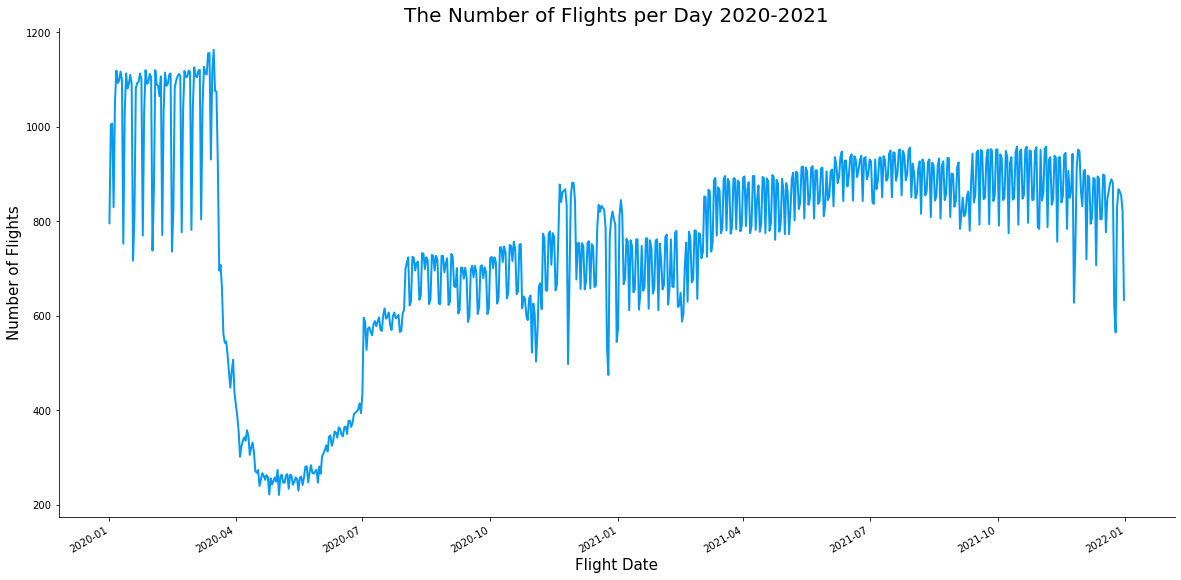

In [29]:
plt.figure(figsize = (20, 10))

# get the number of flights per day using value counts on the FlightDate column and plot the results
atl_df["FlightDate"].value_counts().plot(color = '#069AF3', linewidth = 2)

# plot the label axes and title
plt.xlabel("Flight Date",  fontsize = 15)
plt.ylabel("Number of Flights", fontsize = 15)
plt.title("The Number of Flights per Day 2020-2021", fontsize = 20)

sns.despine()

plt.show()

The number of flights per day were drastically reduced at the end of March 2020, going from ~1,100 flights per day to around 300 flights per day in April 2020 due to the COVID-19 pandemic. The number of daily flights started to increase again around July 2020 but have not returned to the levels seen before the pandemic.

---

Plot the number of flights per airline.

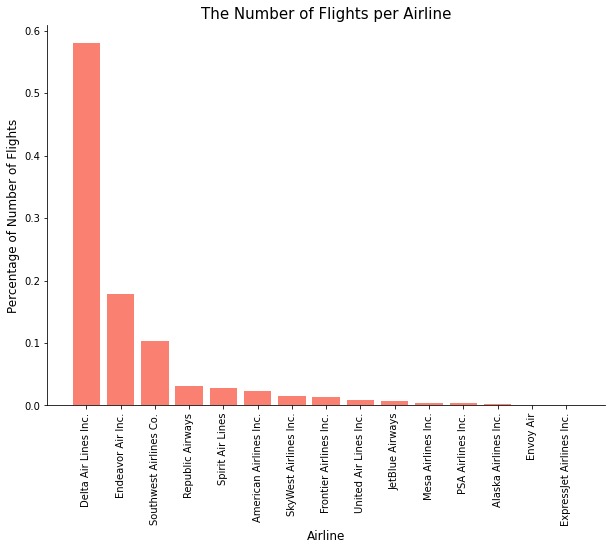

In [30]:
plt.figure(figsize = (10, 7))

# plot the value counts for each airline using a bar plot
plt.bar(atl_df['Airline_Name'].value_counts(normalize = True).index, atl_df['Airline_Name'].value_counts(normalize = True).values, color = "salmon")

# set the lable axes and plot title
plt.xlabel('Airline', fontsize = 12)
plt.xticks(rotation = 90)
plt.ylabel('Percentage of Number of Flights', fontsize = 12)
plt.title('The Number of Flights per Airline', fontsize = 15)

sns.despine()

plt.show()

Delta Air Lines Inc. is the carrier operating with the greatest capacity at Atlanta airport. Delta Air Lines flights account for >50% of all flights. The second most popular airline operating out of Atlanta airport is Endeavor Air Inc., which account for ~20% of flights.

---

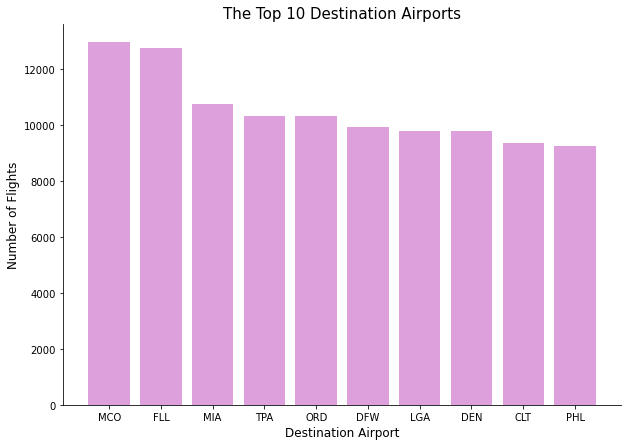

In [31]:
plt.figure(figsize = (10, 7))

# plot the value counts for each destination using a bar plot
# use head(10) to display the top 10 values only
plt.bar(atl_df['Dest'].value_counts().head(10).index, atl_df['Dest'].value_counts().head(10).values, color = "#DDA0DD")

# set the lable axes and plot title
plt.xlabel('Destination Airport', fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel('Number of Flights', fontsize = 12)
plt.title('The Top 10 Destination Airports', fontsize = 15)

sns.despine()

plt.show()

The most popular destination is to Orlando, Florida (MCO).

**Top 10 Destinations by number of flights:**
- MCO - Orlando International Airport
- FLL - Fort Lauderdale-Hollywood Airport
- MIA - Miami International Airport
- TPA - Tampa International Airport
- ORD - O'Hare International Airport
- DFW - Dallas Fort Worth Airport
- LGA - Laguardia Airport (New York)
- DEN - Denver Airport
- CLT - Charlotte Douglas Airport (North Carolina)
- PHL - Philadelphia Airport

The top 4 destinations are to cities in Florida.

---

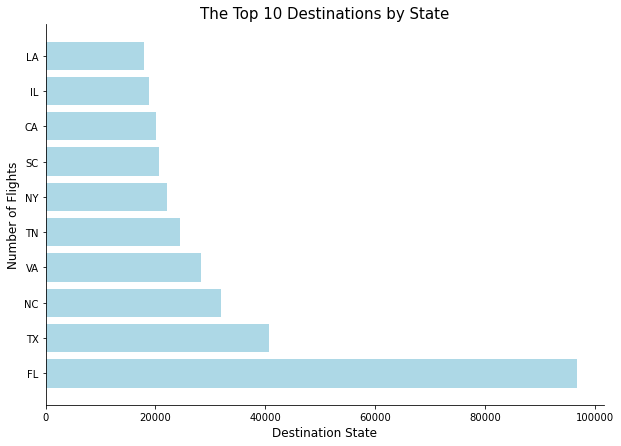

In [32]:
plt.figure(figsize = (10, 7))

# plot the value counts for each state using a bar plot
# use head(10) to display the top 10 values only
plt.barh(atl_df['DestState'].value_counts().head(10).index, 
         atl_df['DestState'].value_counts().head(10).values, 
         color = "lightblue")

# set the lable axes and plot title
plt.xlabel('Destination State', fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel('Number of Flights', fontsize = 12)
plt.title('The Top 10 Destinations by State', fontsize = 15)

sns.despine()

plt.show()

The most popular destination state is Florida, followed by Texas. Except for California (CA), all of the top 10 destination states are located in the Eastern half of the United States.

---

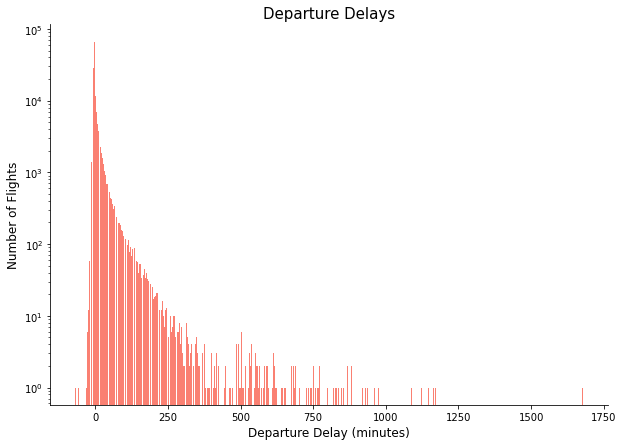

In [33]:
plt.figure(figsize = (10, 7))

# plot the value counts for departure delays using a bar plot
plt.bar(atl_df['DepDelay'].value_counts().index, 
        atl_df['DepDelay'].value_counts().values, 
        color = "salmon")

# set the lable axes and plot title
plt.xlabel('Departure Delay (minutes)', fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel('Number of Flights', fontsize = 12)
plt.title('Departure Delays', fontsize = 15)

# set the y-axis to log values
plt.yscale("log")

sns.despine()

plt.show()

There are some extreme outliers in the Departure Delays column, it is heavily right skewed. The maximum departure delay is 1,677 minutes (27.95 hours), which accounts for a delay longer than 1 day. These outliers need to be dealt with before any analysis can be done on this column. 
This graph also shows that the majority of flights left on time.

---

Plot the distribution of the flights by the distance in miles.

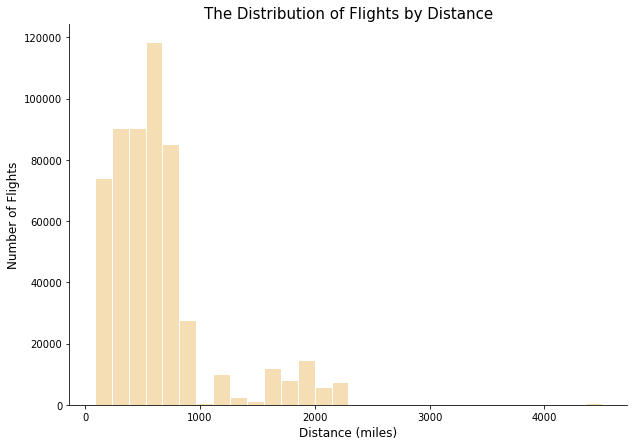

In [36]:
plt.figure(figsize = (10, 7))

# plot the value counts for each day of the week using a bar plot
# use head(10) to display the top 10 values only
plt.hist(atl_df['Distance'], bins = 30, edgecolor = "white", color = "wheat")

# set the lable axes and plot title
plt.xlabel('Distance (miles)', fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel('Number of Flights', fontsize = 12)
plt.title('The Distribution of Flights by Distance', fontsize = 15)

sns.despine()

plt.show()

The distribution of flights by distance is right skewed, with the majority of flights being between 0-1000 miles. This is in line with what was observed earlier that most domestic flights out of Atlanta airport are to destinations in the eastern United States.

---

Create a function to get descriptive statistics for a group.

In [37]:
def group_stats(group):
    '''
    Computes descriptive statistics for the given group, including minimum values, maximum values, count and group mean.
    '''
    
    return {'min': group.min(), 'max': group.max(),'count': group.count(), 'mean': group.mean()}


I'm going to use the function I created above to make a dataframe that holds the results of DepDelay by each Airline. I want to see if there is a correlation with departure delays and airlines.

In [38]:
# select the column of interest 'DepDelay' and group by the airline name
# apply the function 'group_stats' to get the min, max, count and mean of departure delays by airline
# use unstack to create a separate column for each value

airline_stats = atl_df['DepDelay'].groupby(atl_df['Airline_Name']).apply(group_stats).unstack()

# sort values by the number of flights (count)
airline_stats = airline_stats.sort_values('count')

# reset the index so that airline_name is also a column
airline_stats = airline_stats.reset_index()

# view the results
airline_stats

,Airline_Name,min,max,count,mean
0,ExpressJet Airlines Inc.,-21.0,200.0,342.0,0.324561
1,Envoy Air,-12.0,772.0,798.0,10.315789
2,Alaska Airlines Inc.,-26.0,405.0,1176.0,5.239796
3,PSA Airlines Inc.,-58.0,1142.0,2173.0,3.689369
4,Mesa Airlines Inc.,-13.0,1123.0,2315.0,7.042333
5,JetBlue Airways,-23.0,904.0,4041.0,13.319475
6,United Air Lines Inc.,-21.0,1228.0,4477.0,5.839401
7,Frontier Airlines Inc.,-26.0,1171.0,7551.0,9.637135
8,SkyWest Airlines Inc.,-68.0,1088.0,7940.0,8.960579
9,American Airlines Inc.,-27.0,1677.0,12682.0,8.852626


The results of the table show that Delta Air Lines Inc. operates the most domestic flights out of Atlanta airport, while ExpressJet Airlines Inc. operates the fewest domestic flights out of Atlanta airport. The mean departure delay for each airline is quite low, ranging from 0.3-13.3 minutes. However, the min and max departure delays indicate the presence of outliers in this column. 

Plot the relationship of departure delays by airline using a boxplot.

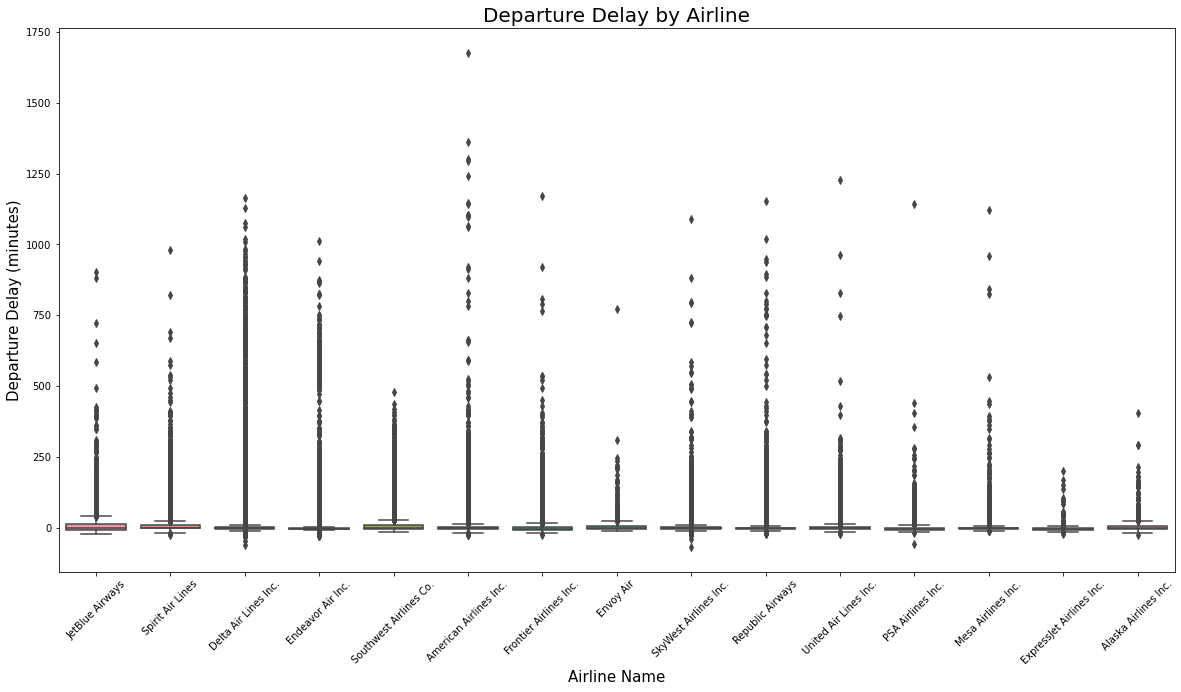

In [39]:
plt.figure(figsize = (20,10))

sns.boxplot(x = "Airline_Name", y = "DepDelay", data = atl_df)

# set the axes labels and plot title
plt.xlabel("Airline Name", fontsize = 15)
plt.ylabel("Departure Delay (minutes)", fontsize = 15)
plt.title("Departure Delay by Airline", fontsize = 20)
plt.xticks(rotation=45)

plt.show()

The plot above shows that the range of delays varies a lot, with some extreme outliers (+1600 minutes - more than a 24 hour delay). To deal with this issue I am choosing to bin the data into categorical classes. Below I will explore what classes are appropriate for the data.

---

## Creating Bins for Departure Delays

First, I need to explore the range of Departure Delays to know how the data should be binned.

Departure delays range from -68 minutes to 1677 miutes. Negative departure delay means that the flight left early.

In [40]:
# get the max and min values for DepDelay

print("The maximum delay is:",  atl_df["DepDelay"].max())
print("The minimum delay is:",  atl_df["DepDelay"].min())

The maximum delay is: 1677.0
The minimum delay is: -68.0


Looking at the number of flights and their departure delay times shows that the majority of flights were actually early. Although I am choosing to focus only on flights that were delayed, I won't drop these rows since I would be losing a significant amount of information. Rather, I will group them with flights that left on-time (DepDelay = 0), since leaving 1-5 minutes early is, roughly speaking, equivalent to leaving on-time.

In [41]:
# use value_counts to get the number of flights per DepDelay time

atl_df["DepDelay"].value_counts()

-3.0      66674
-4.0      64575
-5.0      60114
-2.0      55869
-1.0      44788
          ...  
 615.0        1
 681.0        1
 585.0        1
 614.0        1
 653.0        1
Name: DepDelay, Length: 773, dtype: int64

I want to explore how the data should be binned based on the number of rows contained within certain departure delay thresholds. I'll start with the flights that were early.

Flights that departed 30 minutes or earlier. 
There are only 9 flights that departed more than 30 minutes earlier than their scheduled time. I'm going to drop these rows since they are so few and they won't be included with "on-time" flights.

In [42]:
# use loc to select the rows where DepDelay is less than or equal to -30 minutes
atl_df.loc[atl_df["DepDelay"] <= -30]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
167448,2020,3,8,12,3,2020-08-12,OH,20397,OH,N606NN,5060,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1652,1554,-58.0,0.0,0.0,-2.0,1600-1659,69.0,1703.0,1832.0,5.0,1845,1837,-8.0,0.0,0.0,-1.0,1800-1859,113.0,163.0,89.0,1,547,3,0.0,5.14,0.09,81,94,74,240,21.0,PSA Airlines Inc.,8642274
170983,2020,2,4,21,2,2020-04-21,DL,19790,DL,N911DE,1153,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13931,1393102,33667,ORF,"Norfolk, VA",VA,51,Virginia,38,2135,2102,-33.0,0.0,0.0,-2.0,2100-2159,18.0,2120.0,2316.0,3.0,2310,2319,9.0,9.0,0.0,0.0,2300-2359,95.0,137.0,116.0,1,516,3,0.0,11.18,0.00,63,75,53,310,23.9,Delta Air Lines Inc.,8642274
175858,2021,1,1,9,6,2021-01-09,DL,19790,DL,N333DX,463,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,1825,1725,-60.0,0.0,0.0,-2.0,1800-1859,71.0,1836.0,1956.0,2.0,2004,1958,-6.0,0.0,0.0,-1.0,2000-2059,99.0,153.0,80.0,1,547,3,0.0,14.76,0.00,37,38,31,320,23.9,Delta Air Lines Inc.,8642274
228445,2020,2,4,18,6,2020-04-18,DL,19790,DL,N357NB,2061,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11540,1154005,30615,ELP,"El Paso, TX",TX,48,Texas,74,1130,1058,-32.0,0.0,0.0,-2.0,1100-1159,18.0,1116.0,1241.0,3.0,1233,1244,11.0,11.0,0.0,0.0,1200-1259,183.0,226.0,205.0,1,1282,6,0.0,10.74,0.18,64,70,53,320,21.9,Delta Air Lines Inc.,29527941
287853,2020,1,3,30,1,2020-03-30,OO,20304,OO,N8828D,3888,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14108,1410803,34108,PIA,"Peoria, IL",IL,17,Illinois,41,2134,2026,-68.0,0.0,0.0,-2.0,2100-2159,85.0,2151.0,2219.0,5.0,2235,2224,-11.0,0.0,0.0,-1.0,2200-2259,121.0,178.0,88.0,1,565,3,0.0,9.62,0.00,67,75,60,330,17.0,SkyWest Airlines Inc.,12671469
292537,2020,2,4,4,6,2020-04-04,9E,20363,9E,N904XJ,4669,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13367,1336705,33367,MLI,"Moline, IL",IL,17,Illinois,41,1945,1915,-30.0,0.0,0.0,-2.0,1900-1959,8.0,1923.0,1954.0,3.0,2037,1957,-40.0,0.0,0.0,-2.0,2000-2059,112.0,102.0,91.0,1,633,3,0.0,5.59,0.00,66,78,56,60,15.0,Endeavor Air Inc.,12671469
404927,2020,2,5,2,6,2020-05-02,DL,19790,DL,N335DN,736,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,2148,2102,-46.0,0.0,0.0,-2.0,2100-2159,12.0,2114.0,2220.0,3.0,2307,2223,-44.0,0.0,0.0,-2.0,2300-2359,139.0,141.0,126.0,1,907,4,0.0,4.47,0.00,67,82,52,210,13.0,Delta Air Lines Inc.,5707390
469147,2020,1,3,28,6,2020-03-28,OO,20304,OO,N8942A,3871,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11823,1182304,31823,FWA,"Fort Wayne, IN",IN,18,Indiana,42,1950,1919,-31.0,0.0,0.0,-2.0,1900-1959,19.0,1938.0,2047.0,5.0,2139,2052,-47.0,0.0,0.0,-2.0,2100-2159,109.0,93.0,69.0,1,508,3,0.0,9.62,0.00,74,84,66,240,19.9,SkyWest Airlines Inc.,6805985
504364,2020,2,5,1,5,2020-05-01,OO,20304,OO,N440SW,3842,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11146,1114607,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,1735,1654,-41.0,0.0,0.0,-2.0,1700-1759,47.0,1741.0,1845.0,3.0,1854,1848,-6.0,0.0,0.0,-1.0,1800-1859,79.0,114.0,64.0,1,363,2,0.0,10.51,0.00,60,75,48,330,23.0,SkyWest Airlines Inc.,1782959


---

Next I want to see how many flights had an early departure between 15 and 30 minutes. 

In [43]:
# get all values that are early departures greater than 15 minutes but less than 30 minutes
atl_df.loc[(atl_df["DepDelay"] >= -30) & (atl_df["DepDelay"] <= -15)]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
45,2020,1,1,15,3,2020-01-15,B6,20409,B6,N239JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1320,1304,-16.0,0.0,0.0,-2.0,1300-1359,10.0,1314.0,1513.0,5.0,1555,1518,-37.0,0.0,0.0,-2.0,1500-1559,155.0,134.0,119.0,1,946,4,0.0,4.47,0.00,62,72,56,240,12.1,JetBlue Airways,6984723
98,2020,1,1,27,1,2020-01-27,B6,20409,B6,N203JB,96,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2045,2028,-17.0,0.0,0.0,-2.0,2000-2059,19.0,2047.0,2250.0,6.0,2317,2256,-21.0,0.0,0.0,-2.0,2300-2359,152.0,148.0,123.0,1,946,4,0.0,6.71,0.00,48,53,42,300,15.0,JetBlue Airways,6984723
128,2020,1,2,3,1,2020-02-03,B6,20409,B6,N281JB,96,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2045,2022,-23.0,0.0,0.0,-2.0,2000-2059,14.0,2036.0,2241.0,6.0,2317,2247,-30.0,0.0,0.0,-2.0,2300-2359,152.0,145.0,125.0,1,946,4,0.0,7.83,0.00,57,76,42,200,19.9,JetBlue Airways,6984723
151,2020,1,2,8,6,2020-02-08,B6,20409,B6,N274JB,96,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2045,2025,-20.0,0.0,0.0,-2.0,2000-2059,21.0,2046.0,2241.0,10.0,2317,2251,-26.0,0.0,0.0,-2.0,2300-2359,152.0,146.0,115.0,1,946,4,0.0,3.58,0.12,37,45,31,300,8.9,JetBlue Airways,6984723
255,2020,1,3,17,2,2020-03-17,B6,20409,B6,N267JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1636,1621,-15.0,0.0,0.0,-1.0,1600-1659,16.0,1637.0,1845.0,6.0,1911,1851,-20.0,0.0,0.0,-2.0,1900-1959,155.0,150.0,128.0,1,946,4,0.0,4.03,0.00,56,68,51,80,12.1,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546226,2021,4,10,28,4,2021-10-28,9E,20363,9E,N840AY,4955,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12007,1200704,30894,GTR,"Columbus, MS",MS,28,Mississippi,53,2027,2008,-19.0,0.0,0.0,-2.0,2000-2059,22.0,2030.0,2024.0,4.0,2034,2028,-6.0,0.0,0.0,-1.0,2000-2059,67.0,80.0,54.0,1,241,1,0.0,9.62,0.24,58,61,55,120,19.9,Endeavor Air Inc.,2949965
547363,2020,2,4,6,1,2020-04-06,DL,19790,DL,N102DN,1854,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,1124,1108,-16.0,0.0,0.0,-2.0,1100-1159,13.0,1121.0,1233.0,4.0,1232,1237,5.0,5.0,0.0,0.0,1200-1259,188.0,209.0,192.0,1,1269,6,0.0,6.26,0.00,70,83,58,240,17.0,Delta Air Lines Inc.,2115877
547530,2020,4,12,23,3,2020-12-23,DL,19790,DL,N301DV,1790,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,1935,1919,-16.0,0.0,0.0,-2.0,1900-1959,14.0,1933.0,2057.0,6.0,2100,2103,3.0,3.0,0.0,0.0,2100-2159,205.0,224.0,204.0,1,1269,6,0.0,7.61,0.00,48,60,37,130,15.0,Delta Air Lines Inc.,2115877
549113,2021,1,1,21,4,2021-01-21,DL,19790,DL,N363NW,556,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,8

Early departures between 15 and 30 minutes only account for 1,574 flights. I'm going to drop these rows as well since they account for a very small fraction of the total flights (~0.002%).

---

Look at the number of flights that had an early departure between 0 and 15 minutes.

In [44]:
# get all values that are early departures greater than 0 minutes but less than 15 minutes
atl_df.loc[(atl_df["DepDelay"] >= -15) & (atl_df["DepDelay"] <= 0)]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
2,2020,1,1,2,4,2020-01-02,B6,20409,B6,N206JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1004,-6.0,0.0,0.0,-1.0,1000-1059,12.0,1016.0,1219.0,6.0,1245,1225,-20.0,0.0,0.0,-2.0,1200-1259,155.0,141.0,123.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,JetBlue Airways,6984723
3,2020,1,1,3,5,2020-01-03,B6,20409,B6,N775JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,500,-1.0,0.0,0.0,-1.0,0001-0559,14.0,514.0,709.0,19.0,733,728,-5.0,0.0,0.0,-1.0,0700-0759,152.0,148.0,115.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,JetBlue Airways,6984723
8,2020,1,1,6,1,2020-01-06,B6,20409,B6,N190JB,2296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1315,1310,-5.0,0.0,0.0,-1.0,1300-1359,12.0,1322.0,1519.0,9.0,1550,1528,-22.0,0.0,0.0,-2.0,1500-1559,155.0,138.0,117.0,1,946,4,0.0,5.82,0.00,48,63,38,300,10.1,JetBlue Airways,6984723
9,2020,1,1,6,1,2020-01-06,B6,20409,B6,N645JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1012,1007,-5.0,0.0,0.0,-1.0,1000-1059,14.0,1021.0,1220.0,5.0,1247,1225,-22.0,0.0,0.0,-2.0,1200-1259,155.0,138.0,119.0,1,946,4,0.0,5.82,0.00,48,63,38,300,10.1,JetBlue Airways,6984723
10,2020,1,1,6,1,2020-01-06,B6,20409,B6,N564JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1604,1601,-3.0,0.0,0.0,-1.0,1600-1659,12.0,1613.0,1807.0,10.0,1841,1817,-24.0,0.0,0.0,-2.0,1800-1859,157.0,136.0,114.0,1,946,4,0.0,5.82,0.00,48,63,38,300,10.1,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549345,2021,4,12,12,7,2021-12-12,DL,19790,DL,N122DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,949,-1.0,0.0,0.0,-1.0,0900-0959,13.0,1002.0,1210.0,4.0,1232,1214,-18.0,0.0,0.0,-2.0,1200-1259,282.0,265.0,248.0,1,1838,8,0.0,7.61,0.00,49,58,36,330,23.9,Delta Air Lines Inc.,1900923
549347,2021,4,12,2,4,2021-12-02,DL,19790,DL,N345DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,950,0.0,0.0,0.0,0.0,0900-0959,12.0,1002.0,1205.0,3.0,1237,1208,-29.0,0.0,0.0,-2.0,1200-1259,287.0,258.0,243.0,1,1838,8,0.0,8.28,0.00,59,74,49,300,18.1,Delta Air Lines Inc.,1900923
549348,2021,4,12,3,5,2021-12-03,DL,19790,DL,N385DZ,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,947,-3.0,0.0,0.0,-1.0,0900-0959,14.0,1001.0,1154.0,4.0,1237,1158,-39.0,0.0,0.0,-2.0,1200-1259,287.0,251.0,233.0,1,1838,8,0.0,5.82,0.00,61,77,50,280,10.1,Delta Air Lines Inc.,1900923
549350,2021,4,12,13,1,2021-12-13,DL,19790,DL,N313DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,942,-8.0,0.0,0.0,-1.0,0900-0959,24.0,100

This range between 0 and -15 minutes accounts for the majority of flights, I will use this range as class 1 (on-time flights). 

---

Explore the number of flights where the departure delay was between 0 and 15 minutes.

In [45]:
# get all delayed departure values from 0 to 15 minutes
atl_df.loc[(atl_df["DepDelay"] >= 0) & (atl_df["DepDelay"] <= 15)]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.00,45,57,36,280,13.000000,JetBlue Airways,6984723
1,2020,1,1,2,4,2020-01-02,B6,20409,B6,N606JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,507,6.0,6.0,0.0,0.0,0001-0559,13.0,520.0,720.0,5.0,733,725,-8.0,0.0,0.0,-1.0,0700-0759,152.0,138.0,120.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.100000,JetBlue Airways,6984723
5,2020,1,1,4,6,2020-01-04,B6,20409,B6,N768JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,506,5.0,5.0,0.0,0.0,0001-0559,11.0,517.0,658.0,4.0,733,702,-31.0,0.0,0.0,-2.0,0700-0759,152.0,116.0,101.0,1,946,4,0.0,14.54,0.14,56,59,37,300,33.099998,JetBlue Airways,6984723
13,2020,1,1,7,2,2020-01-07,B6,20409,B6,N648JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1604,1607,3.0,3.0,0.0,0.0,1600-1659,13.0,1620.0,1818.0,4.0,1841,1822,-19.0,0.0,0.0,-2.0,1800-1859,157.0,135.0,118.0,1,946,4,0.0,12.75,0.02,53,57,43,300,25.900000,JetBlue Airways,6984723
17,2020,1,1,8,3,2020-01-08,B6,20409,B6,N337JB,796,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2017,2021,4.0,4.0,0.0,0.0,2000-2059,15.0,2036.0,2238.0,4.0,2250,2242,-8.0,0.0,0.0,-1.0,2200-2259,153.0,141.0,122.0,1,946,4,0.0,6.71,0.00,47,61,36,320,14.100000,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549339,2021,4,12,23,4,2021-12-23,DL,19790,DL,N368DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,956,957,1.0,1.0,0.0,0.0,0900-0959,19.0,1016.0,1259.0,7.0,1238,1306,28.0,28.0,1.0,1.0,1200-1259,282.0,309.0,283.0,1,1838,8,0.0,5.37,0.00,45,61,34,320,15.000000,Delta Air Lines Inc.,1900923
549340,2021,4,12,26,7,2021-12-26,DL,19790,DL,N396DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,956,956,0.0,0.0,0.0,0.0,0900-0959,17.0,1013.0,1240.0,5.0,1238,1245,7.0,7.0,0.0,0.0,1200-1259,282.0,289.0,267.0,1,1838,8,0.0,5.37,0.00,66,75,58,240,14.100000,Delta Air Lines Inc.,1900923
549343,2021,4,12,29,3,2021-12-29,DL,19790,DL,N320DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,956,1008,12.0,12.0,0.0,0.0,0900-0959,33.0,1041.0,1250.0,7.0,1238,1257,19.0,19.0,1.0,1.0,1200-1259,282.0,289.0,249.0,1,1838,8,0.0,9.17,0.28,68,74,65,300,18.100000,Delta Air Lines Inc.,1900923
549346,2021,4,12,9,4,2021-12-09,DL,19790,DL,N128DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,951,1.0,1.0,0.0,0.0,0900-095

Delayed departures between 0-15 minutes account for the majority of delays. I want to see how many delayed flights occurred between 15 and 30 minutes to know whether I should create a bin with delays between 0-15 minutes or 0-30 minutes. 

In [46]:
# get all delayed departure values from 0 to 30 minutes
atl_df.loc[(atl_df["DepDelay"] >= 15) & (atl_df["DepDelay"] <= 30)]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
4,2020,1,1,3,5,2020-01-03,B6,20409,B6,N197JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1032,22.0,22.0,1.0,1.0,1000-1059,56.0,1128.0,1325.0,7.0,1245,1332,47.0,47.0,1.0,3.0,1200-1259,155.0,180.0,117.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.000000,JetBlue Airways,6984723
6,2020,1,1,4,6,2020-01-04,B6,20409,B6,N307JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1604,1631,27.0,27.0,1.0,1.0,1600-1659,15.0,1646.0,1824.0,12.0,1841,1836,-5.0,0.0,0.0,-1.0,1800-1859,157.0,125.0,98.0,1,946,4,0.0,14.54,0.14,56,59,37,300,33.099998,JetBlue Airways,6984723
57,2020,1,1,17,5,2020-01-17,B6,20409,B6,N653JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1558,1624,26.0,26.0,1.0,1.0,1500-1559,12.0,1636.0,1846.0,20.0,1835,1906,31.0,31.0,1.0,2.0,1800-1859,157.0,162.0,130.0,1,946,4,0.0,10.74,0.00,51,56,45,110,18.100000,JetBlue Airways,6984723
61,2020,1,1,18,6,2020-01-18,B6,20409,B6,N334JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1636,1706,30.0,30.0,1.0,2.0,1600-1659,12.0,1718.0,1915.0,16.0,1912,1931,19.0,19.0,1.0,1.0,1900-1959,156.0,145.0,117.0,1,946,4,0.0,7.83,0.54,46,54,43,100,17.000000,JetBlue Airways,6984723
65,2020,1,1,19,7,2020-01-19,B6,20409,B6,N583JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1558,1614,16.0,16.0,1.0,1.0,1500-1559,12.0,1626.0,1826.0,7.0,1835,1833,-2.0,0.0,0.0,-1.0,1800-1859,157.0,139.0,120.0,1,946,4,0.0,15.66,0.01,48,56,32,310,25.100000,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549260,2021,3,8,17,2,2021-08-17,DL,19790,DL,N884DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2052,24.0,24.0,1.0,1.0,2000-2059,12.0,2104.0,2300.0,5.0,2245,2305,20.0,20.0,1.0,1.0,2200-2259,257.0,253.0,236.0,1,1838,8,0.0,12.08,2.86,74,79,72,60,25.100000,Delta Air Lines Inc.,1900923
549278,2021,3,8,14,6,2021-08-14,DL,19790,DL,N818DA,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2051,23.0,23.0,1.0,1.0,2000-2059,15.0,2106.0,2304.0,7.0,2245,2311,26.0,26.0,1.0,1.0,2200-2259,257.0,260.0,238.0,1,1838,8,0.0,4.25,0.04,83,94,73,130,25.900000,Delta Air Lines Inc.,1900923
549294,2021,3,9,2,4,2021-09-02,DL,19790,DL,N917DU,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2049,21.0,21.0,1.0,1.0,2000-2059,12.0,2101.0,2251.0,8.0,2245,2259,14.0,14.0,0.0,0.0,2200-2259,257.0,250.0,230.0,1,1838,8,0.0,6.49,0.00,77,86,70,90,14.100000,Delta Air Lines Inc.,1900923
549325,2021,4,11,29,1,2021-11-29,DL,19790,DL,N113DX,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,1

There are only 29,244 flights that have a delay between 15-30 minutes. In order to not create too many classes for the delays I will group delays between 0-30 minutes as Class 2.

---

Next, I want to explore delays >30 minutes.

In [47]:
# get all delayed departure values from 30 to 60 minutes
atl_df.loc[(atl_df["DepDelay"] >= 30) & (atl_df["DepDelay"] <= 60)]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
26,2020,1,1,10,5,2020-01-10,B6,20409,B6,N529JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1558,1638,40.0,40.0,1.0,2.0,1500-1559,15.0,1653.0,1900.0,10.0,1835,1910,35.0,35.0,1.0,2.0,1800-1859,157.0,152.0,127.0,1,946,4,0.0,10.29,0.00,58,66,50,110,14.1,JetBlue Airways,6984723
59,2020,1,1,18,6,2020-01-18,B6,20409,B6,N179JB,96,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2045,2116,31.0,31.0,1.0,2.0,2000-2059,14.0,2130.0,2322.0,68.0,2317,30,73.0,73.0,1.0,4.0,2300-2359,152.0,194.0,112.0,1,946,4,0.0,7.83,0.54,46,54,43,100,17.0,JetBlue Airways,6984723
61,2020,1,1,18,6,2020-01-18,B6,20409,B6,N334JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1636,1706,30.0,30.0,1.0,2.0,1600-1659,12.0,1718.0,1915.0,16.0,1912,1931,19.0,19.0,1.0,1.0,1900-1959,156.0,145.0,117.0,1,946,4,0.0,7.83,0.54,46,54,43,100,17.0,JetBlue Airways,6984723
97,2020,1,1,26,7,2020-01-26,B6,20409,B6,N203JB,796,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1820,1909,49.0,49.0,1.0,3.0,1800-1859,15.0,1924.0,2126.0,5.0,2055,2131,36.0,36.0,1.0,2.0,2000-2059,155.0,142.0,122.0,1,946,4,0.0,6.04,0.00,40,51,33,310,13.0,JetBlue Airways,6984723
111,2020,1,1,30,4,2020-01-30,B6,20409,B6,N183JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1320,1357,37.0,37.0,1.0,2.0,1300-1359,15.0,1412.0,1606.0,4.0,1555,1610,15.0,15.0,1.0,1.0,1500-1559,155.0,133.0,114.0,1,946,4,0.0,8.05,0.00,48,59,40,50,12.1,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549269,2021,3,8,20,5,2021-08-20,DL,19790,DL,N816DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2117,49.0,49.0,1.0,3.0,2000-2059,18.0,2135.0,2332.0,9.0,2245,2341,56.0,56.0,1.0,3.0,2200-2259,257.0,264.0,237.0,1,1838,8,0.0,8.05,0.00,78,89,72,320,16.1,Delta Air Lines Inc.,1900923
549271,2021,3,8,16,1,2021-08-16,DL,19790,DL,N820DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2115,47.0,47.0,1.0,3.0,2000-2059,20.0,2135.0,2335.0,3.0,2245,2338,53.0,53.0,1.0,3.0,2200-2259,257.0,263.0,240.0,1,1838,8,0.0,8.50,0.75,77,84,72,110,23.0,Delta Air Lines Inc.,1900923
549277,2021,3,8,22,7,2021-08-22,DL,19790,DL,N838DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2124,56.0,56.0,1.0,3.0,2000-2059,22.0,2146.0,2333.0,8.0,2245,2341,56.0,56.0,1.0,3.0,2200-2259,257.0,257.0,227.0,1,1838,8,0.0,8.95,0.62,79,87,74,310,23.9,Delta Air Lines Inc.,1900923
549288,2021,3,9,20,1,2021-09-20,DL,19790,DL,N335DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,920,1018,58.0,58.0,1.0,3.0,

There are 20,091 flights that were delayed between 30-60 minutes.

Next, look at the flights that were delayed between 60 and 120 minutes.

In [48]:
# get all delayed departure values from 60 to 120 minutes
atl_df.loc[(atl_df["DepDelay"] >= 60) & (atl_df["DepDelay"] <= 120)]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
7,2020,1,1,5,7,2020-01-05,B6,20409,B6,N796JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,622,81.0,81.0,1.0,5.0,0001-0559,31.0,653.0,900.0,4.0,733,904,91.0,91.0,1.0,6.0,0700-0759,152.0,162.0,127.0,1,946,4,0.0,8.28,0.00,41,55,32,320,21.9,JetBlue Airways,6984723
141,2020,1,2,6,4,2020-02-06,B6,20409,B6,N503JB,96,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2045,2229,104.0,104.0,1.0,6.0,2000-2059,34.0,2303.0,54.0,3.0,2317,57,100.0,100.0,1.0,6.0,2300-2359,152.0,148.0,111.0,1,946,4,0.0,11.18,2.30,64,72,50,270,30.0,JetBlue Airways,6984723
142,2020,1,2,6,4,2020-02-06,B6,20409,B6,N309JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1320,1506,106.0,106.0,1.0,7.0,1300-1359,20.0,1526.0,1720.0,8.0,1555,1728,93.0,93.0,1.0,6.0,1500-1559,155.0,142.0,114.0,1,946,4,0.0,11.18,2.30,64,72,50,270,30.0,JetBlue Airways,6984723
144,2020,1,2,6,4,2020-02-06,B6,20409,B6,N775JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1558,1732,94.0,94.0,1.0,6.0,1500-1559,20.0,1752.0,2000.0,8.0,1835,2008,93.0,93.0,1.0,6.0,1800-1859,157.0,156.0,128.0,1,946,4,0.0,11.18,2.30,64,72,50,270,30.0,JetBlue Airways,6984723
145,2020,1,2,6,4,2020-02-06,B6,20409,B6,N317JB,796,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1820,1936,76.0,76.0,1.0,5.0,1800-1859,31.0,2007.0,2158.0,7.0,2055,2205,70.0,70.0,1.0,4.0,2000-2059,155.0,149.0,111.0,1,946,4,0.0,11.18,2.30,64,72,50,270,30.0,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549257,2021,3,8,7,6,2021-08-07,DL,19790,DL,N817DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2028,2210,102.0,102.0,1.0,6.0,2000-2059,11.0,2221.0,29.0,4.0,2245,33,108.0,108.0,1.0,7.0,2200-2259,257.0,263.0,248.0,1,1838,8,0.0,4.25,0.00,79,88,72,330,19.9,Delta Air Lines Inc.,1900923
549270,2021,3,8,3,2,2021-08-03,DL,19790,DL,N396DA,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,2023,2128,65.0,65.0,1.0,4.0,2000-2059,11.0,2139.0,2333.0,5.0,2240,2338,58.0,58.0,1.0,3.0,2200-2259,257.0,250.0,234.0,1,1838,8,0.0,8.50,1.43,76,84,70,70,23.9,Delta Air Lines Inc.,1900923
549317,2021,4,10,3,7,2021-10-03,DL,19790,DL,N346DN,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,920,1041,81.0,81.0,1.0,5.0,0900-0959,11.0,1052.0,1236.0,4.0,1140,1240,60.0,60.0,1.0,4.0,1100-1159,260.0,239.0,224.0,1,1838,8,0.0,5.37,0.51,72,78,68,220,15.0,Delta Air Lines Inc.,1900923
549318,2021,4,11,21,7,2021-11-21,DL,19790,DL,N388DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,1132,102.0,102.0,1.0,6.0,0900-0

There are 10,944 flights that were delayed between 60-120 minutes. Flights delayed between 30-120 minutes account for approximately 30,000 flights. In order to reduce the number of classes I will group these flights together as Class 3.

---

Finally, I want to explore more extreme delays >120 minutes.

In [49]:
# view all flights that were delayed by >120 minutes 
atl_df.loc[atl_df["DepDelay"] >= 120]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population
28,2020,1,1,11,6,2020-01-11,B6,20409,B6,N183JB,96,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,2045,2319,154.0,154.0,1.0,10.0,2000-2059,11.0,2330.0,121.0,4.0,2317,125,128.0,128.0,1.0,8.0,2300-2359,152.0,126.0,111.0,1,946,4,0.0,14.32,1.28,65,70,60,240,25.9,JetBlue Airways,6984723
32,2020,1,1,12,7,2020-01-12,B6,20409,B6,N373JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1320,1544,144.0,144.0,1.0,9.0,1300-1359,25.0,1609.0,1801.0,13.0,1555,1814,139.0,139.0,1.0,9.0,1500-1559,155.0,150.0,112.0,1,946,4,0.0,4.25,0.00,60,69,49,310,21.0,JetBlue Airways,6984723
147,2020,1,2,7,5,2020-02-07,B6,20409,B6,N228JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1320,2132,492.0,492.0,1.0,12.0,1300-1359,15.0,2147.0,2338.0,17.0,1555,2355,480.0,480.0,1.0,12.0,1500-1559,155.0,143.0,111.0,1,946,4,0.0,13.20,0.00,44,50,34,290,25.9,JetBlue Airways,6984723
224,2020,1,2,28,5,2020-02-28,B6,20409,B6,N187JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1609,1915,186.0,186.0,1.0,12.0,1600-1659,15.0,1930.0,2128.0,13.0,1844,2141,177.0,177.0,1.0,11.0,1800-1859,155.0,146.0,118.0,1,946,4,0.0,10.51,0.00,42,54,32,290,25.9,JetBlue Airways,6984723
320,2020,1,3,8,7,2020-03-08,B6,20409,B6,N323JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1033,1444,251.0,251.0,1.0,12.0,1000-1059,13.0,1457.0,1707.0,18.0,1307,1725,258.0,258.0,1.0,12.0,1300-1359,154.0,161.0,130.0,1,946,4,0.0,6.04,0.00,50,62,38,170,15.0,JetBlue Airways,6984723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548964,2021,3,7,6,2,2021-07-06,DL,19790,DL,N180DN,1409,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10299,1029906,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,1525,1752,147.0,147.0,1.0,9.0,1500-1559,17.0,1809.0,2112.0,5.0,1858,2117,139.0,139.0,1.0,9.0,1800-1859,453.0,445.0,423.0,1,3417,11,0.0,7.83,0.11,79,86,71,180,21.0,Delta Air Lines Inc.,732673
549005,2021,3,8,20,5,2021-08-20,DL,19790,DL,N192DN,1409,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10299,1029906,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,1529,1749,140.0,140.0,1.0,9.0,1500-1559,14.0,1803.0,2111.0,4.0,1905,2115,130.0,130.0,1.0,8.0,1900-1959,456.0,446.0,428.0,1,3417,11,0.0,8.05,0.00,78,89,72,320,16.1,Delta Air Lines Inc.,732673
549059,2021,4,11,20,6,2021-11-20,DL,19790,DL,N826MH,1409,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10299,1029906,30299,ANC,"Anchorage, AK",AK,2,Alaska,1,1515,1922,247.0,247.0,1.0,12.0,1500-1559,17.0,1939.0,2312.0,3.0,1919,2315,236.0,236.0,1.0,12.0,1900-1959,484.0,473.0,453.0,1,3417,11,0.0,11.86,0.00,48,58,37,90,19.9,Delta Air Lines Inc.,732673
549242,2021,3,7,27,2,2021-07-27,DL,19790,DL,N380DA,1111,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,

There are 5,537 flights where the departure delay was greater than 120 minutes. These are the outliers in the data set and will be removed since their presence will skew the data and I'm more interested in predicting delays that occur more frequently.

**SUMMARY**

- Class 1 (on-time flights) will consist of all flights that were between -15 and 0 minutes Departure Delay
- Class 2 (0-30 minutes delay) will consist of all flights that were delayed between 0 and 30 minutes
- Class 3 (30-120 minutes delay) will consist of all flights that were delayed between 30 and 120 minutes

---

### Create Bins

I will create bins for the 3 classes I described above using `cut`.

In [50]:
# the classes I'm creating are between -15-0, 0-30, and 30-120
# the label names are 1, 2 and 3
# need to add include_lowest = True so that all delays that are -15 are included in the first class

atl_df["Dep_Delay_classes"] = pd.cut(atl_df["DepDelay"], [-15, 0, 30, 120], labels = ['1', '2', '3'], include_lowest = True)

# Class 1 = -15 - 0 -> On-time Departure
# Class 2 = 0 - 30 -> Delayed departure between 0 and 30 minutes
# Class 3 = 30 - 120 -> Delayed departure between 30 and 120 minutes

In [51]:
# check the new column has been correctly created
atl_df.head()

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population,Dep_Delay_classes
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.00,45,57,36,280,13.0,JetBlue Airways,6984723,2
1,2020,1,1,2,4,2020-01-02,B6,20409,B6,N606JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,507,6.0,6.0,0.0,0.0,0001-0559,13.0,520.0,720.0,5.0,733,725,-8.0,0.0,0.0,-1.0,0700-0759,152.0,138.0,120.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,JetBlue Airways,6984723,2
2,2020,1,1,2,4,2020-01-02,B6,20409,B6,N206JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1004,-6.0,0.0,0.0,-1.0,1000-1059,12.0,1016.0,1219.0,6.0,1245,1225,-20.0,0.0,0.0,-2.0,1200-1259,155.0,141.0,123.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.1,JetBlue Airways,6984723,1
3,2020,1,1,3,5,2020-01-03,B6,20409,B6,N775JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,500,-1.0,0.0,0.0,-1.0,0001-0559,14.0,514.0,709.0,19.0,733,728,-5.0,0.0,0.0,-1.0,0700-0759,152.0,148.0,115.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,JetBlue Airways,6984723,1
4,2020,1,1,3,5,2020-01-03,B6,20409,B6,N197JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1032,22.0,22.0,1.0,1.0,1000-1059,56.0,1128.0,1325.0,7.0,1245,1332,47.0,47.0,1.0,3.0,1200-1259,155.0,180.0,117.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.0,JetBlue Airways,6984723,2


Plot the distribution of the new classes to check the class balance.

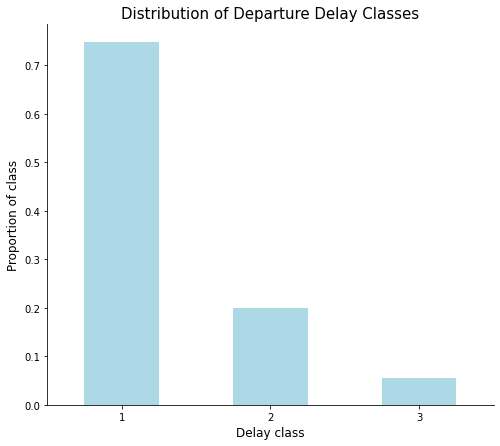

In [90]:
plt.figure(figsize = (8, 7))

# use normalize = True to get the percent distribution of each class
atl_df["Dep_Delay_classes"].value_counts(normalize = True).plot(kind = "bar", color = "lightblue")


# set axes labels and plot title
plt.xlabel("Delay class", fontsize = 12)
plt.ylabel("Proportion of class", fontsize = 12)
plt.xticks(rotation = 0)
plt.title("Distribution of Departure Delay Classes", fontsize = 15)

sns.despine()

plt.show()

There exists significant class imbalance within the Departure Delay classes. This can make class predictions more difficult when modeling because the model will learn the underlying distribution of class 1 better than classes 2 or 3 since there are more data points for class 1. Balancing these classes will be explored in the next notebook (see Notebook 4 Balancing Target Classes).

---

The rows that fall outside of these departure delay class thresholds need to be dropped from the dataframe.

Check the shape of the dataframe before dropping rows.

In [53]:
atl_df.shape

(549352, 64)

Drop rows where DepDelay is less than -15 minutes.

In [54]:
# use index to specify that the rows where this is true are dropped
# inplace = True will drop the rows without needing to overwrite the dataframe manually

atl_df.drop(atl_df[atl_df["DepDelay"] < -15].index, inplace = True)

Check the shape of the dataframe after dropping rows where DepDelay is <-15 minutes.

In [55]:
atl_df.shape

(548433, 64)

Repeat for rows where DepDelay is greater than 120 minutes.

In [56]:
atl_df.drop(atl_df[atl_df["DepDelay"] > 120].index, inplace=True)

Check the shape of the dataframe after dropping rows where DepDelay is >120 minutes.

In [57]:
atl_df.shape

(542969, 64)

Check that the maximum and minimum values for DepDelay are not greater than 120 or less than -15.

In [58]:
print("Max Dep Delay value is:", atl_df["DepDelay"].max())
print("Min Dep Delay value is:", atl_df["DepDelay"].min())

Max Dep Delay value is: 120.0
Min Dep Delay value is: -15.0


There should be no missing values in the dataframe. Quick sanity check.

In [59]:
atl_df.isnull().sum().sum()

0

There are no missing values in the dataframe, outliers within the DepDelay column have been dealt with and bins for departure delays have been created.

---

Calculate the mean delay for class 2.

In [60]:
atl_df.loc[atl_df["Dep_Delay_classes"] == "2"]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WSF2,Airline_Name,Dest_State_Population,Dep_Delay_classes
0,2020,1,1,1,3,2020-01-01,B6,20409,B6,N583JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,503,2.0,2.0,0.0,0.0,0001-0559,12.0,515.0,712.0,5.0,733,717,-16.0,0.0,0.0,-2.0,0700-0759,152.0,134.0,117.0,1,946,4,0.0,7.16,0.00,45,57,36,280,13.000000,JetBlue Airways,6984723,2
1,2020,1,1,2,4,2020-01-02,B6,20409,B6,N606JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,507,6.0,6.0,0.0,0.0,0001-0559,13.0,520.0,720.0,5.0,733,725,-8.0,0.0,0.0,-1.0,0700-0759,152.0,138.0,120.0,1,946,4,0.0,6.71,0.92,47,50,46,40,16.100000,JetBlue Airways,6984723,2
4,2020,1,1,3,5,2020-01-03,B6,20409,B6,N197JB,396,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1010,1032,22.0,22.0,1.0,1.0,1000-1059,56.0,1128.0,1325.0,7.0,1245,1332,47.0,47.0,1.0,3.0,1200-1259,155.0,180.0,117.0,1,946,4,0.0,5.82,0.97,56,63,50,300,23.000000,JetBlue Airways,6984723,2
5,2020,1,1,4,6,2020-01-04,B6,20409,B6,N768JB,996,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,501,506,5.0,5.0,0.0,0.0,0001-0559,11.0,517.0,658.0,4.0,733,702,-31.0,0.0,0.0,-2.0,0700-0759,152.0,116.0,101.0,1,946,4,0.0,14.54,0.14,56,59,37,300,33.099998,JetBlue Airways,6984723,2
6,2020,1,1,4,6,2020-01-04,B6,20409,B6,N307JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1604,1631,27.0,27.0,1.0,1.0,1600-1659,15.0,1646.0,1824.0,12.0,1841,1836,-5.0,0.0,0.0,-1.0,1800-1859,157.0,125.0,98.0,1,946,4,0.0,14.54,0.14,56,59,37,300,33.099998,JetBlue Airways,6984723,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549333,2021,4,12,16,4,2021-12-16,DL,19790,DL,N357DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,950,953,3.0,3.0,0.0,0.0,0900-0959,14.0,1007.0,1234.0,5.0,1232,1239,7.0,7.0,0.0,0.0,1200-1259,282.0,286.0,267.0,1,1838,8,0.0,5.14,0.00,56,67,51,80,10.100000,Delta Air Lines Inc.,1900923,2
549339,2021,4,12,23,4,2021-12-23,DL,19790,DL,N368DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,956,957,1.0,1.0,0.0,0.0,0900-0959,19.0,1016.0,1259.0,7.0,1238,1306,28.0,28.0,1.0,1.0,1200-1259,282.0,309.0,283.0,1,1838,8,0.0,5.37,0.00,45,61,34,320,15.000000,Delta Air Lines Inc.,1900923,2
549343,2021,4,12,29,3,2021-12-29,DL,19790,DL,N320DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Idaho,83,956,1008,12.0,12.0,0.0,0.0,0900-0959,33.0,1041.0,1250.0,7.0,1238,1257,19.0,19.0,1.0,1.0,1200-1259,282.0,289.0,249.0,1,1838,8,0.0,9.17,0.28,68,74,65,300,18.100000,Delta Air Lines Inc.,1900923,2
549346,2021,4,12,9,4,2021-12-09,DL,19790,DL,N128DN,835,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10713,1071302,30713,BOI,"Boise, ID",ID,16,Ida

The mean delay for class 2 is 10 minutes.

Calculate the mean delay for class 3.

In [61]:
atl_df.loc[atl_df["Dep_Delay_classes"] == "3"]["DepDelay"].mean()

57.35108947753906

The mean delay for class 3 is 57 minutes.

---

Calculate the mean delay for both classes.

Save the results of class 2 delays in a dataframe.

In [62]:
delays_2 = atl_df.loc[atl_df["Dep_Delay_classes"] == "2"]

Save the results of class 3 delays in a dataframe.

In [63]:
delays_3 = atl_df.loc[atl_df["Dep_Delay_classes"] == "3"]

Concatenate the results.

In [64]:
delays_2_3 = pd.concat([delays_2, delays_3])

Calculate the mean delay for classes 2 and 3.

In [65]:
delays_2_3["DepDelay"].mean()

20.2230281829834

The mean delay across both classes is 20 minutes. This metric will be useful later when I calculate the estimated cost savings with the final model outputs.

---

Plotting the same boxplot from earlier shows that all airlines have a mean departure delay close to 0 minutes, and that 75% of flights are below a 40 minute departure delay across all airlines. A few airlines stand out as having a greater percentage of delays, which is evident from the size of the upper quartile range. 
These airlines are: 
- JetBlue Airways
- Spirit Airlines
- Southwest Airlines
- Envoy Air
- Alaska Air

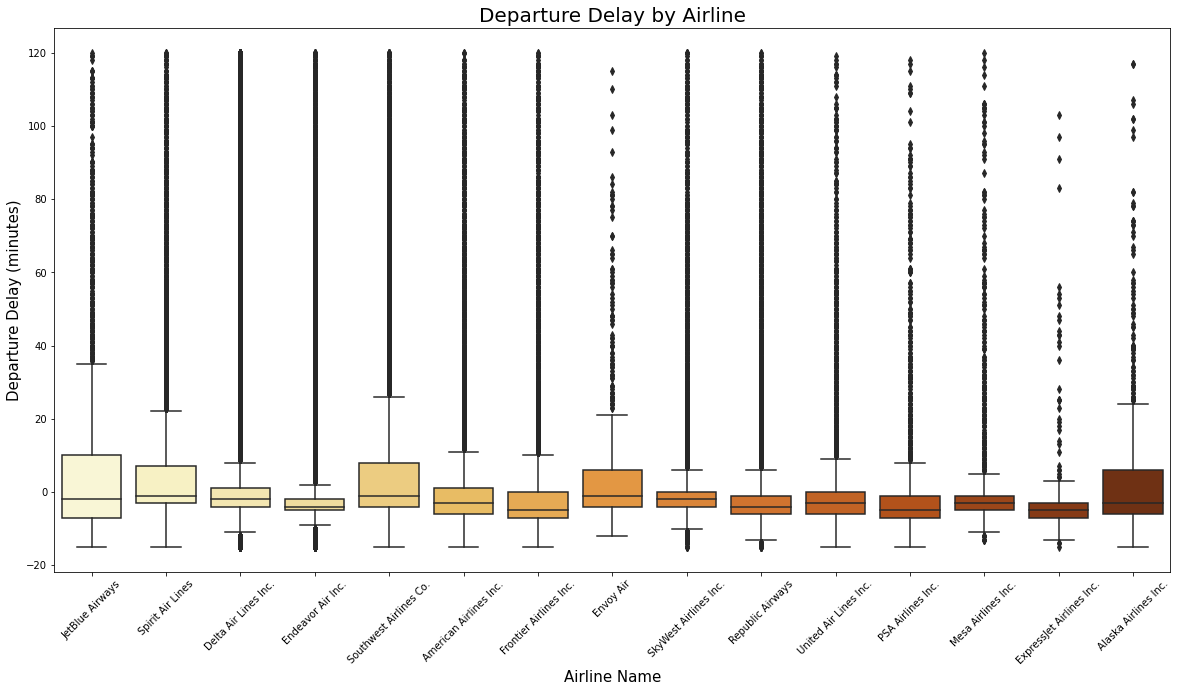

In [66]:
plt.figure(figsize = (20,10))

sns.boxplot(x = "Airline_Name", y = "DepDelay", data = atl_df, palette = "YlOrBr")

# set the axes labels and plot title
plt.xlabel("Airline Name", fontsize = 15)
plt.ylabel("Departure Delay (minutes)", fontsize = 15)
plt.title("Departure Delay by Airline", fontsize = 20)
plt.xticks(rotation=45)

plt.show()

I'm going to visualize the departure delay classes by airline. According to the boxplot above I expect that JetBlue Airways, Spirit Airlines, Southwest Airlines, Envoy Air and Alaska Air will have a higher number of values for class 2 and 3.

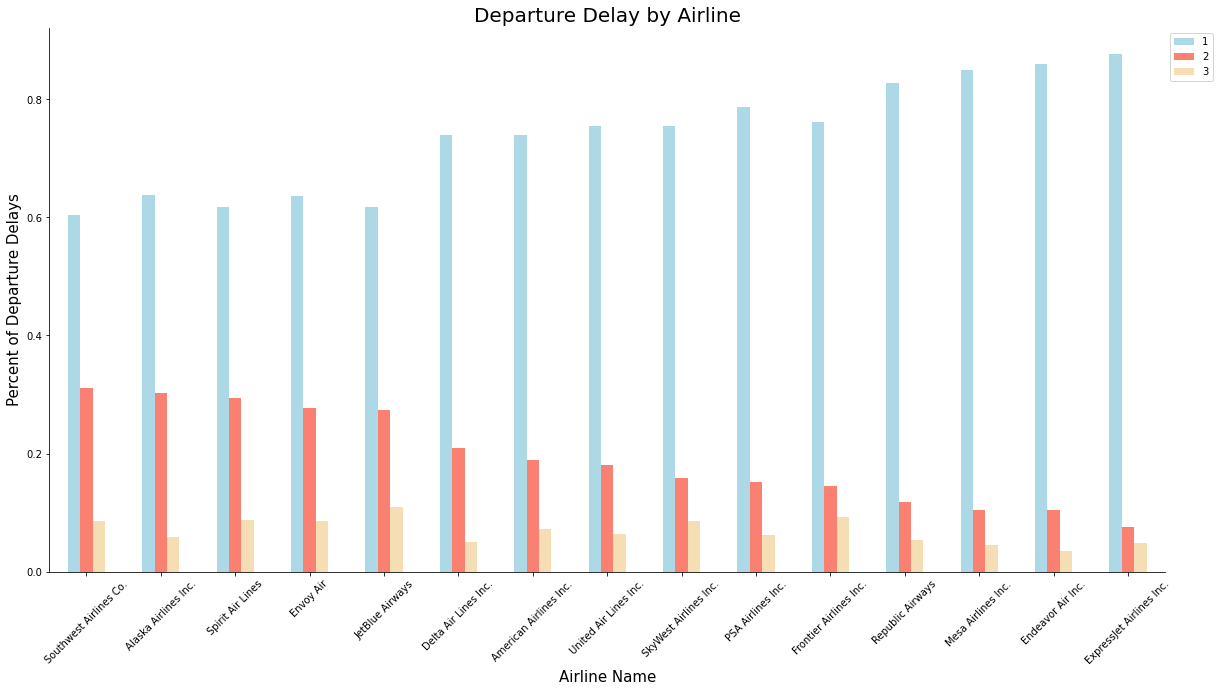

In [67]:
# group by the airline and delay classes and count the number of flights in each class
# divide this number by the number of flights per delay class for each airline to get a percent value
airline_delay_data = atl_df.groupby(["Airline_Name", "Dep_Delay_classes"])["Dep_Delay_classes"].count() / atl_df.groupby("Airline_Name")["Dep_Delay_classes"].count()

# plot the results
# use unstack to get separate columns for each delay class
# sort values according to class 2 (0-30 minute delays) in descending order
# set stacked = False so each class is represented side by side
airline_delay_data.unstack()[["1", "2", "3"]].sort_values("2", ascending = False).plot(kind="bar", stacked = False, color = ["lightblue", "salmon", "wheat"], figsize = (20,10))


# set the axes labels, plot title and legend
plt.xlabel("Airline Name", fontsize = 15)
plt.ylabel("Percent of Departure Delays", fontsize = 15)
plt.title("Departure Delay by Airline", fontsize = 20)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = "upper left")

sns.despine()

plt.show()

Southwest Airlines has the highest number of flight delays, class 2 delays account for nearly 35% of all their flights. This graph also shows that extreme delays between 30-120 minutes are less common across all airlines.

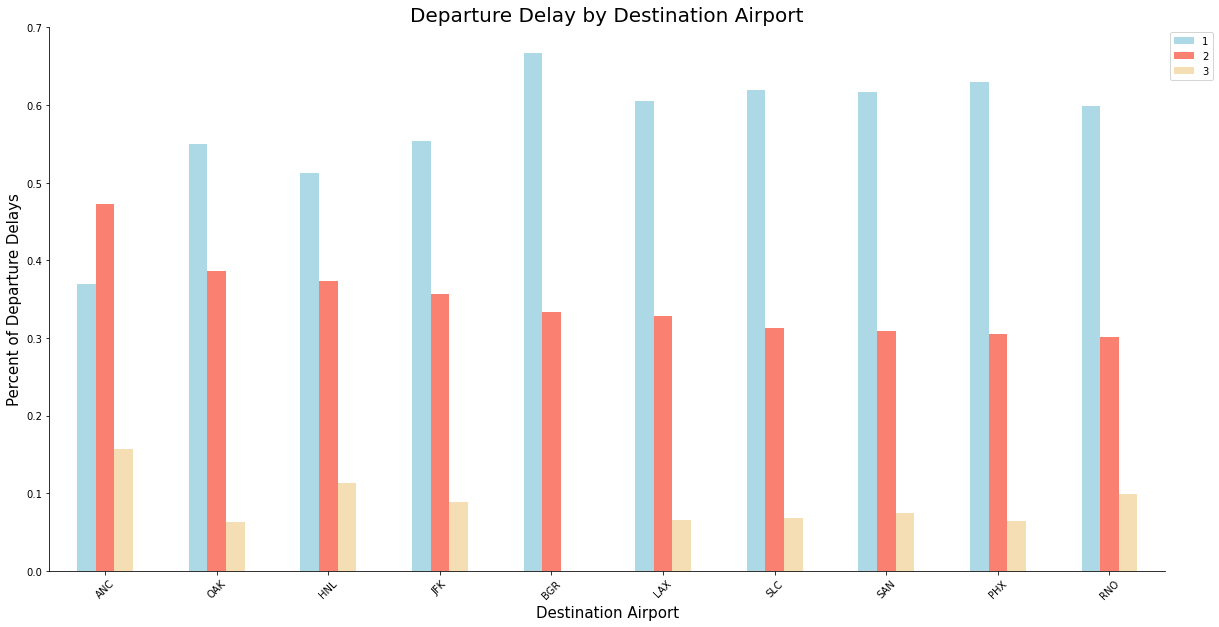

In [68]:
# group by the airline and delay classes and count the number of flights in each class
# divide this number by the number of flights per delay class for each airline to get a percent value
dest_delay_data = atl_df.groupby(["Dest", "Dep_Delay_classes"])["Dep_Delay_classes"].count() / atl_df.groupby("Dest")["Dep_Delay_classes"].count()

# plot the results
# use unstack to get separate columns for each delay class
# sort values according to class 2 (0-30 minute delays) in descending order
# set stacked = False so each class is represented side by side
# use head(10) to get only the top 10 destination airports
dest_delay_data.unstack()[["1", "2", "3"]].sort_values("2", ascending = False).head(10).plot(kind="bar", stacked = False, color = ["lightblue", "salmon", "wheat"], figsize = (20,10))


# set the axes labels, plot title and legend
plt.xlabel("Destination Airport", fontsize = 15)
plt.ylabel("Percent of Departure Delays", fontsize = 15)
plt.title("Departure Delay by Destination Airport", fontsize = 20)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.0, 1.0), loc = "upper left")

sns.despine()

plt.show()

The top 10 routes which have the most delays between 0-30 minutes:
- ANC: Ted Stevens Anchorage International Airport (Alaska)
- OAK: Oakland International Airport (California)
- HNL: Daniel K. Inouye International Airport (Hawaii)
- JFK: John F. Kennedy International Airport (New York)
- BGR: Bangor International Airport (Maine)
- LAX: Los Angeles International Airport (California)
- SLC: Salt Lake City International Airport (Utah)
- SAN: San Diego International Airport (California)
- PHX: Phoenix Sky Harbor International Airport (Arizona)
- RNO: Reno-Tahoe International Airport (Nevada)


Except for JFK, all of these destinations are greater than >1000 miles away. 

---

Save a copy of the final csv and a pickle version to be used for modeling using `to_csv` and `to_pickle`.

In [69]:
atl_df.to_csv("data/atl_final.csv")

In [70]:
atl_df.to_pickle("data/atl_final.pkl")

---

## Feature Selection

Since I'm only interested in departure delays I'm not considering any features that provide information after takeoff.

In [71]:
# check which columns are numeric using dtype and selecting all columns that include float and integer types

numeric_columns = atl_df.select_dtypes(["float", "int"]).columns
numeric_columns

Index(['Year', 'DOT_ID_Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'CRSDepTime',
       'DepTime', 'CRSArrTime', 'ArrTime', 'Distance', 'TAVG', 'TMAX', 'TMIN',
       'WDF2', 'Dest_State_Population'],
      dtype='object')

In [72]:
# check which columns are categorical

categorical_columns = atl_df.select_dtypes(["object"]).columns
categorical_columns

Index(['Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateName', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DepTimeBlk',
       'ArrTimeBlk', 'Airline_Name'],
      dtype='object')

In [73]:
atl_df[categorical_columns].nunique()

Reporting_Airline                15
IATA_CODE_Reporting_Airline      15
Tail_Number                    4525
Origin                            1
OriginCityName                    1
OriginState                       1
OriginStateName                   1
Dest                            170
DestCityName                    166
DestState                        49
DestStateName                    49
DepTimeBlk                       19
ArrTimeBlk                       19
Airline_Name                     15
dtype: int64

I'm not going to convert any of the categorical columns into numeric columns because there are already numeric representations of these columns (such as DOT_ID_Reporting_Airline and DestAirportID). There are too many unique Tail numbers to encode this variable and a flight number identifier is available in Flight_Number_Reporting_Airline.

The columns to be included in the modeling are:

- Year
- Month
- Quarter
- DayofMonth
- DayofWeek
- DOT_ID_Reporting_Airline
- Flight_Number_Reporting_Airline
- DestAirportID
- DestStateFips
- CRSDepTime
- Distance
- DistanceGroup
- AWND
- PRCP
- TAVG
- TMAX
- TMIN
- WDF2
- WSF2
- Dest_State_Population
- Dep_Delay_classes - target variable

Split data into feature and target variables.

In [74]:
X = atl_df[["Year", "Month", "DayofMonth", "Quarter", "DayofWeek", "DOT_ID_Reporting_Airline", "Flight_Number_Reporting_Airline", "DestAirportID", "DestStateFips", "CRSDepTime", "Distance", "DistanceGroup", "AWND", "PRCP", "TAVG", "TMAX", "TMIN", "WDF2", "WSF2", "Dest_State_Population"]]

y = atl_df["Dep_Delay_classes"]

In [75]:
# check the shape of the variables
X.shape, y.shape

((542969, 20), (542969,))

---

### KBest Feature Selection

I'm using the KBest feature selection method from sklearn to identify which features are most predictive of departure delays.

In [76]:
# use function f_classif since I'm predicting 3 classes
# instantiate 
my_KBest = SelectKBest(f_classif)

#fit KBest on X and y
my_KBest.fit(X, y)

SelectKBest()

Use `np.array` to get a list of all the columns in X, and `get_support` to select the features that were selected by KBest.

In [77]:
np.array(X.columns)[my_KBest.get_support()]

array(['Year', 'DOT_ID_Reporting_Airline',
       'Flight_Number_Reporting_Airline', 'CRSDepTime', 'Distance',
       'DistanceGroup', 'PRCP', 'TAVG', 'TMIN', 'Dest_State_Population'],
      dtype=object)

Use `scores_` to get the scores assigned to each feature by KBest.

In [78]:
my_KBest.scores_

array([4804.36170093,  188.4927045 ,    9.0705759 ,  196.90653429,
        293.85347072, 4414.69384201, 3253.39467343,   49.23599584,
         33.29540123, 2405.39622172, 3011.86861954, 3046.51379141,
         54.61848622, 3196.3283642 ,  940.5213581 ,  491.12177739,
       1178.60634426,   57.80119482,  702.93927923, 1260.42968468])

Create a dataframe that stores the feature name and its KBest score.

In [79]:
# use X.columns to get the feature names and my_KBest.scores_ to get the KBest scores

KBest_scores = pd.DataFrame({"Features": X.columns, "KBest_Scores": my_KBest.scores_})

In [80]:
KBest_scores

,Features,KBest_Scores
0,Year,4804.361701
1,Month,188.492704
2,DayofMonth,9.070576
3,Quarter,196.906534
4,DayofWeek,293.853471
5,DOT_ID_Reporting_Airline,4414.693842
6,Flight_Number_Reporting_Airline,3253.394673
7,DestAirportID,49.235996
8,DestStateFips,33.295401
9,CRSDepTime,2405.396222


According to KBest the features that are most predictive of the departure delay classes are:
- Year
- DOT_IT_Reporting_Airline
- Flight_Number_Reporting_Airline
- DistanceGroup
- Distance
- PRCP
- CRSDepTIme

It's surprising that the Destination Airport has a relatively low score, I would expect that to have a greater affect on whether or not a flight is delayed.

---

Check for multicollinearity between features using `sns.heatmap` to produce a heatmap of the correlations between the features in X.

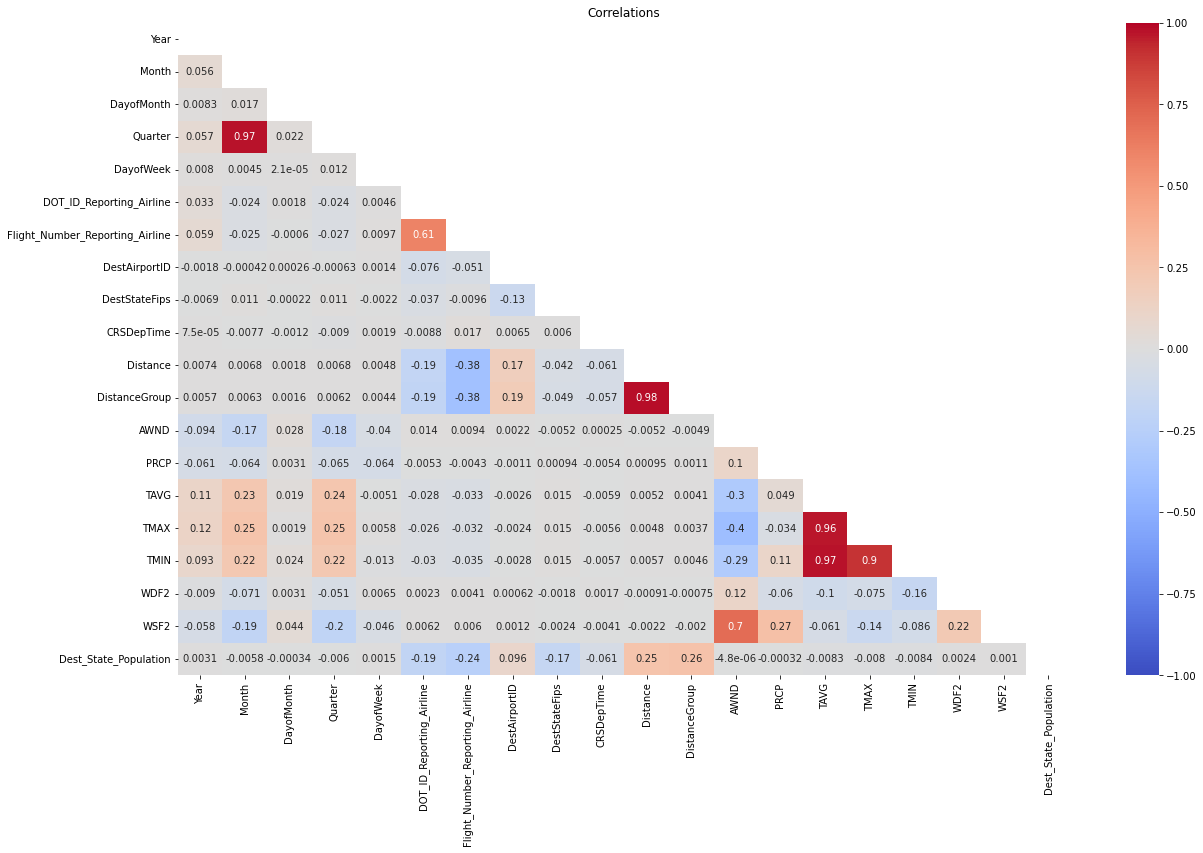

In [81]:
plt.figure(figsize = (20,12))

sns.heatmap(X.corr(), cmap = "coolwarm", annot = True, vmin = -1, vmax = 1, mask = np.triu(X.corr()))

plt.title("Correlations")

plt.show()

A lot of strong multicollinearity:
- Quarter and Month are strongly positively correlated (0.97)
- Flight_Number_Reporting_Airline and DOT_ID_Reporting_Airline are positively correlated (0.6)
- Distance and Distance Group are strongly positively correlated (0.98)
- AWND and WSF2 are positively correlated (0.7)
- TAVG and TMIN are strongly positively correlated (0.97)
- TAVG and TMAX are strongly positively correlated (0.96)
- TMAX and TMIN are strongly positively correlated (0.90)

To remove the effects of multicollinearity I'm going to drop Month, Flight_Number_Reporting_Airline, Distance, AWND, TMAX and TAVG. I'm choosing to drop these columns vs the other correlated columns because these columns have lower KBest scores and therefore are less predictive of departure delays.

In [82]:
X = X.drop(columns = ["Month", "Flight_Number_Reporting_Airline", "Distance", "AWND", "TMAX", "TAVG"])

The remaining columns do not exhibit multicollinearity.

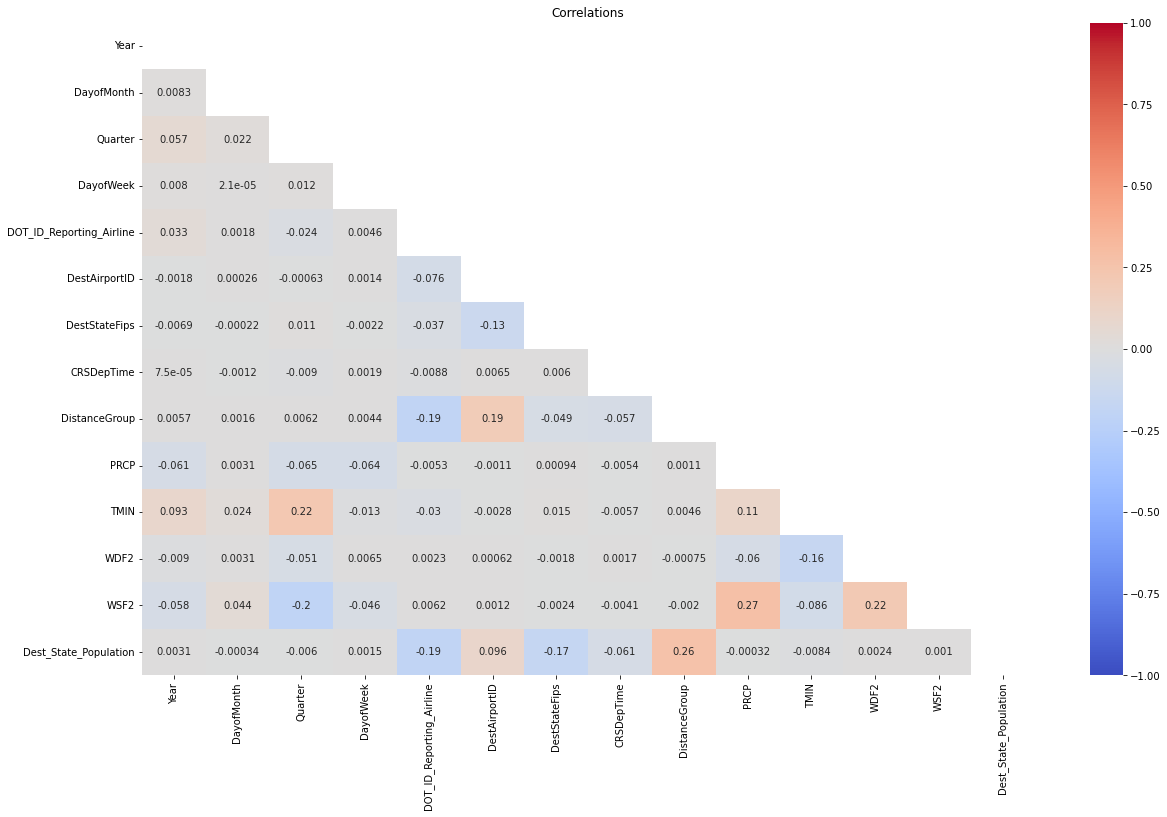

In [83]:
plt.figure(figsize = (20,12))

sns.heatmap(X.corr(), cmap = "coolwarm", annot = True, vmin = -1, vmax = 1, mask = np.triu(X.corr()))

plt.title("Correlations")

plt.show()

Check the final shape of X.

In [84]:
X.shape

(542969, 14)

---

## Train, test split

Split data into remainder and test sets and then into train and validation sets for modeling.

Set test_size = 0.2, to keep 80% of the data in the remainder set and 20% in the test set. Set random_state = 10 so the same results are generated each time the cell is run, and stratify = y so the proportion of classes are maintained in each split.

In [85]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

Check the shape of the new data sets.

In [86]:
X_remainder.shape, y_remainder.shape, X_test.shape, y_test.shape

((434375, 14), (434375,), (108594, 14), (108594,))

Now split the data into train and validation for fitting and testing the model. Split into 70% for training and 30% for validation.

In [87]:
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, random_state = 10, stratify = y_remainder)


Check the shape.

In [88]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((304062, 14), (130313, 14), (304062,), (130313,))

Save X_test, y_test, X_train, y_train, X_validation and y_validation to use in modeling notebooks.

In [89]:
X_test.to_pickle("data/X_test.pkl")
y_test.to_pickle("data/y_test.pkl")

X_train.to_pickle("data/X_train.pkl")
y_train.to_pickle("data/y_train.pkl")

X_validation.to_pickle("data/X_validation.pkl")
y_validation.to_pickle("data/y_validation.pkl")

---

### Next Steps

Before modeling I'm going to balance the departure delay classes in notebook 4 (Balancing Target Classes).